In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(1, "../src/features")
import data_cleaning

# allows all columns to be displayed
pd.set_option('display.max_columns', None)

In [2]:
OFFER_DATA_ROUGH = "../data/offer_acceptance_offers.csv"
ORDER_DATE_ROUGH = "../data/offer_acceptance_orders.csv"


OFFER_DATA_DIR = "../data/pickles/merged_clean2_outlier_removed.pkl"
ORDER_DATA_DIR = "../data/pickles/orders_clean2_outlier_removed.pkl"

offer_rough = pd.read_csv(OFFER_DATA_ROUGH)
order_rough = pd.read_csv(ORDER_DATE_ROUGH)

merged = pd.read_pickle(OFFER_DATA_DIR)
order = pd.read_pickle(ORDER_DATA_DIR).reset_index()

<ipython-input-2-95dadfb26d71>:9: DtypeWarning: Columns (9,10,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  order_rough = pd.read_csv(ORDER_DATE_ROUGH)


In [3]:
order.head(5)

,REFERENCE_NUMBER,CARRIER_ID,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
0,60316,26717,2019-11-13 05:53:26,1077.15,0,0,2019-11-04 09:11:34,2019-11-13 11:00:00,273,467,544.0,26.0,1,0,0,1,1,0.0,0,967.5000,1,217.0,5.0,-8.857569e+06,4.252157e+06,-9.485917e+06,5.010174e+06,11,4,2,45,11,13,2,46,11,13,2,46,1,0,1,1
1,18193,4932,2019-11-13 07:12:11,3096.00,0,0,2019-11-06 08:10:02,2019-11-15 17:00:00,971,770,2285.0,24.0,1,0,0,1,1,0.0,1,3058.0353,1,224.0,57.0,-1.374801e+07,5.685799e+06,-1.062056e+07,3.455990e+06,11,6,2,45,11,15,2,46,11,13,2,46,1,0,2,2
2,115347,2429,2019-11-14 10:55:36,1290.00,0,0,2019-11-06 14:42:18,2019-11-14 15:30:00,945,983,798.0,12.0,1,0,0,1,1,0.0,0,1034.0382,1,192.0,4.0,-1.358223e+07,4.559742e+06,-1.368258e+07,5.981599e+06,11,6,3,45,11,14,3,46,11,14,3,46,1,0,1,1
3,7067,7813,2019-11-15 08:49:56,1290.00,0,0,2019-11-06 15:24:11,2019-11-20 16:00:00,928,604,1971.0,13.0,1,0,0,1,1,0.0,0,999.7500,1,336.0,127.0,-1.310308e+07,3.983839e+06,-9.807845e+06,5.041104e+06,11,6,4,45,11,20,4,47,11,15,4,46,1,0,5,5
4,158844,2676,2019-11-22 07:12:47,1548.00,0,0,2019-11-06 15:59:11,2019-11-22 16:00:00,928,985,1113.0,11.0,1,0,0,1,1,0.0,0,1161.0000,1,384.0,8.0,-1.310308e+07,3.983839e+06,-1.373606e+07,5.921827e+06,11,6,4,45,11,22,4,47,11,22,4,47,1,0,1,1


In [4]:
merged.head(5)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL
0,1,1,2019-11-13 05:30:16,1290.0,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0
1,2,2,2019-12-06 08:43:01,2709.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0
2,3,2,2019-12-06 08:45:31,3225.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0
3,4,2,2019-12-06 08:48:09,2580.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0
4,5,2,2019-12-06 08:49:46,3870.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0


In [5]:
merge_order = pd.merge(merged, order[['REFERENCE_NUMBER', 'OFFER_COUNT', "FTL_OFFER_COUNT"]], how = "left", on = "REFERENCE_NUMBER")

In [6]:
from sklearn.cluster import KMeans
coords = pd.concat([merged[["ORIGIN_X", "ORIGIN_Y"]].rename({"ORIGIN_X": "X", "ORIGIN_Y": "Y"}, axis=1), merged[["DESTINATION_X", "DESTINATION_Y"]].rename({"DESTINATION_X": "X", "DESTINATION_Y": "Y"}, axis=1)], ignore_index=True)
Kmean = KMeans(n_clusters=10)
Kmean.fit(coords)
coords["cluster"] = Kmean.predict(coords)

unique_cluster = coords.groupby(['X', 'Y']).first().reset_index()
unique_cluster

merge_order["ORIGIN_CLUSTER"] = merge_order[["ORIGIN_X","ORIGIN_Y"]].merge(unique_cluster, left_on = ["ORIGIN_X", "ORIGIN_Y"], right_on = ['X', 'Y'])['cluster']
merge_order["DESTINATION_CLUTER"] = merge_order[["DESTINATION_X","DESTINATION_Y"]].merge(unique_cluster, left_on = ["DESTINATION_X", "DESTINATION_Y"], right_on = ['X', 'Y'])['cluster']
orgin = list(map(str, merge_order['ORIGIN_CLUSTER'].array))
dest = list(map(str, merge_order['DESTINATION_CLUTER'].array))
merge_order["ORGIN_DEST_COMB"] = [int(x+y) for x,y in zip(orgin,dest)]

In [72]:
pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
from yellowbrick.cluster import KElbowVisualizer

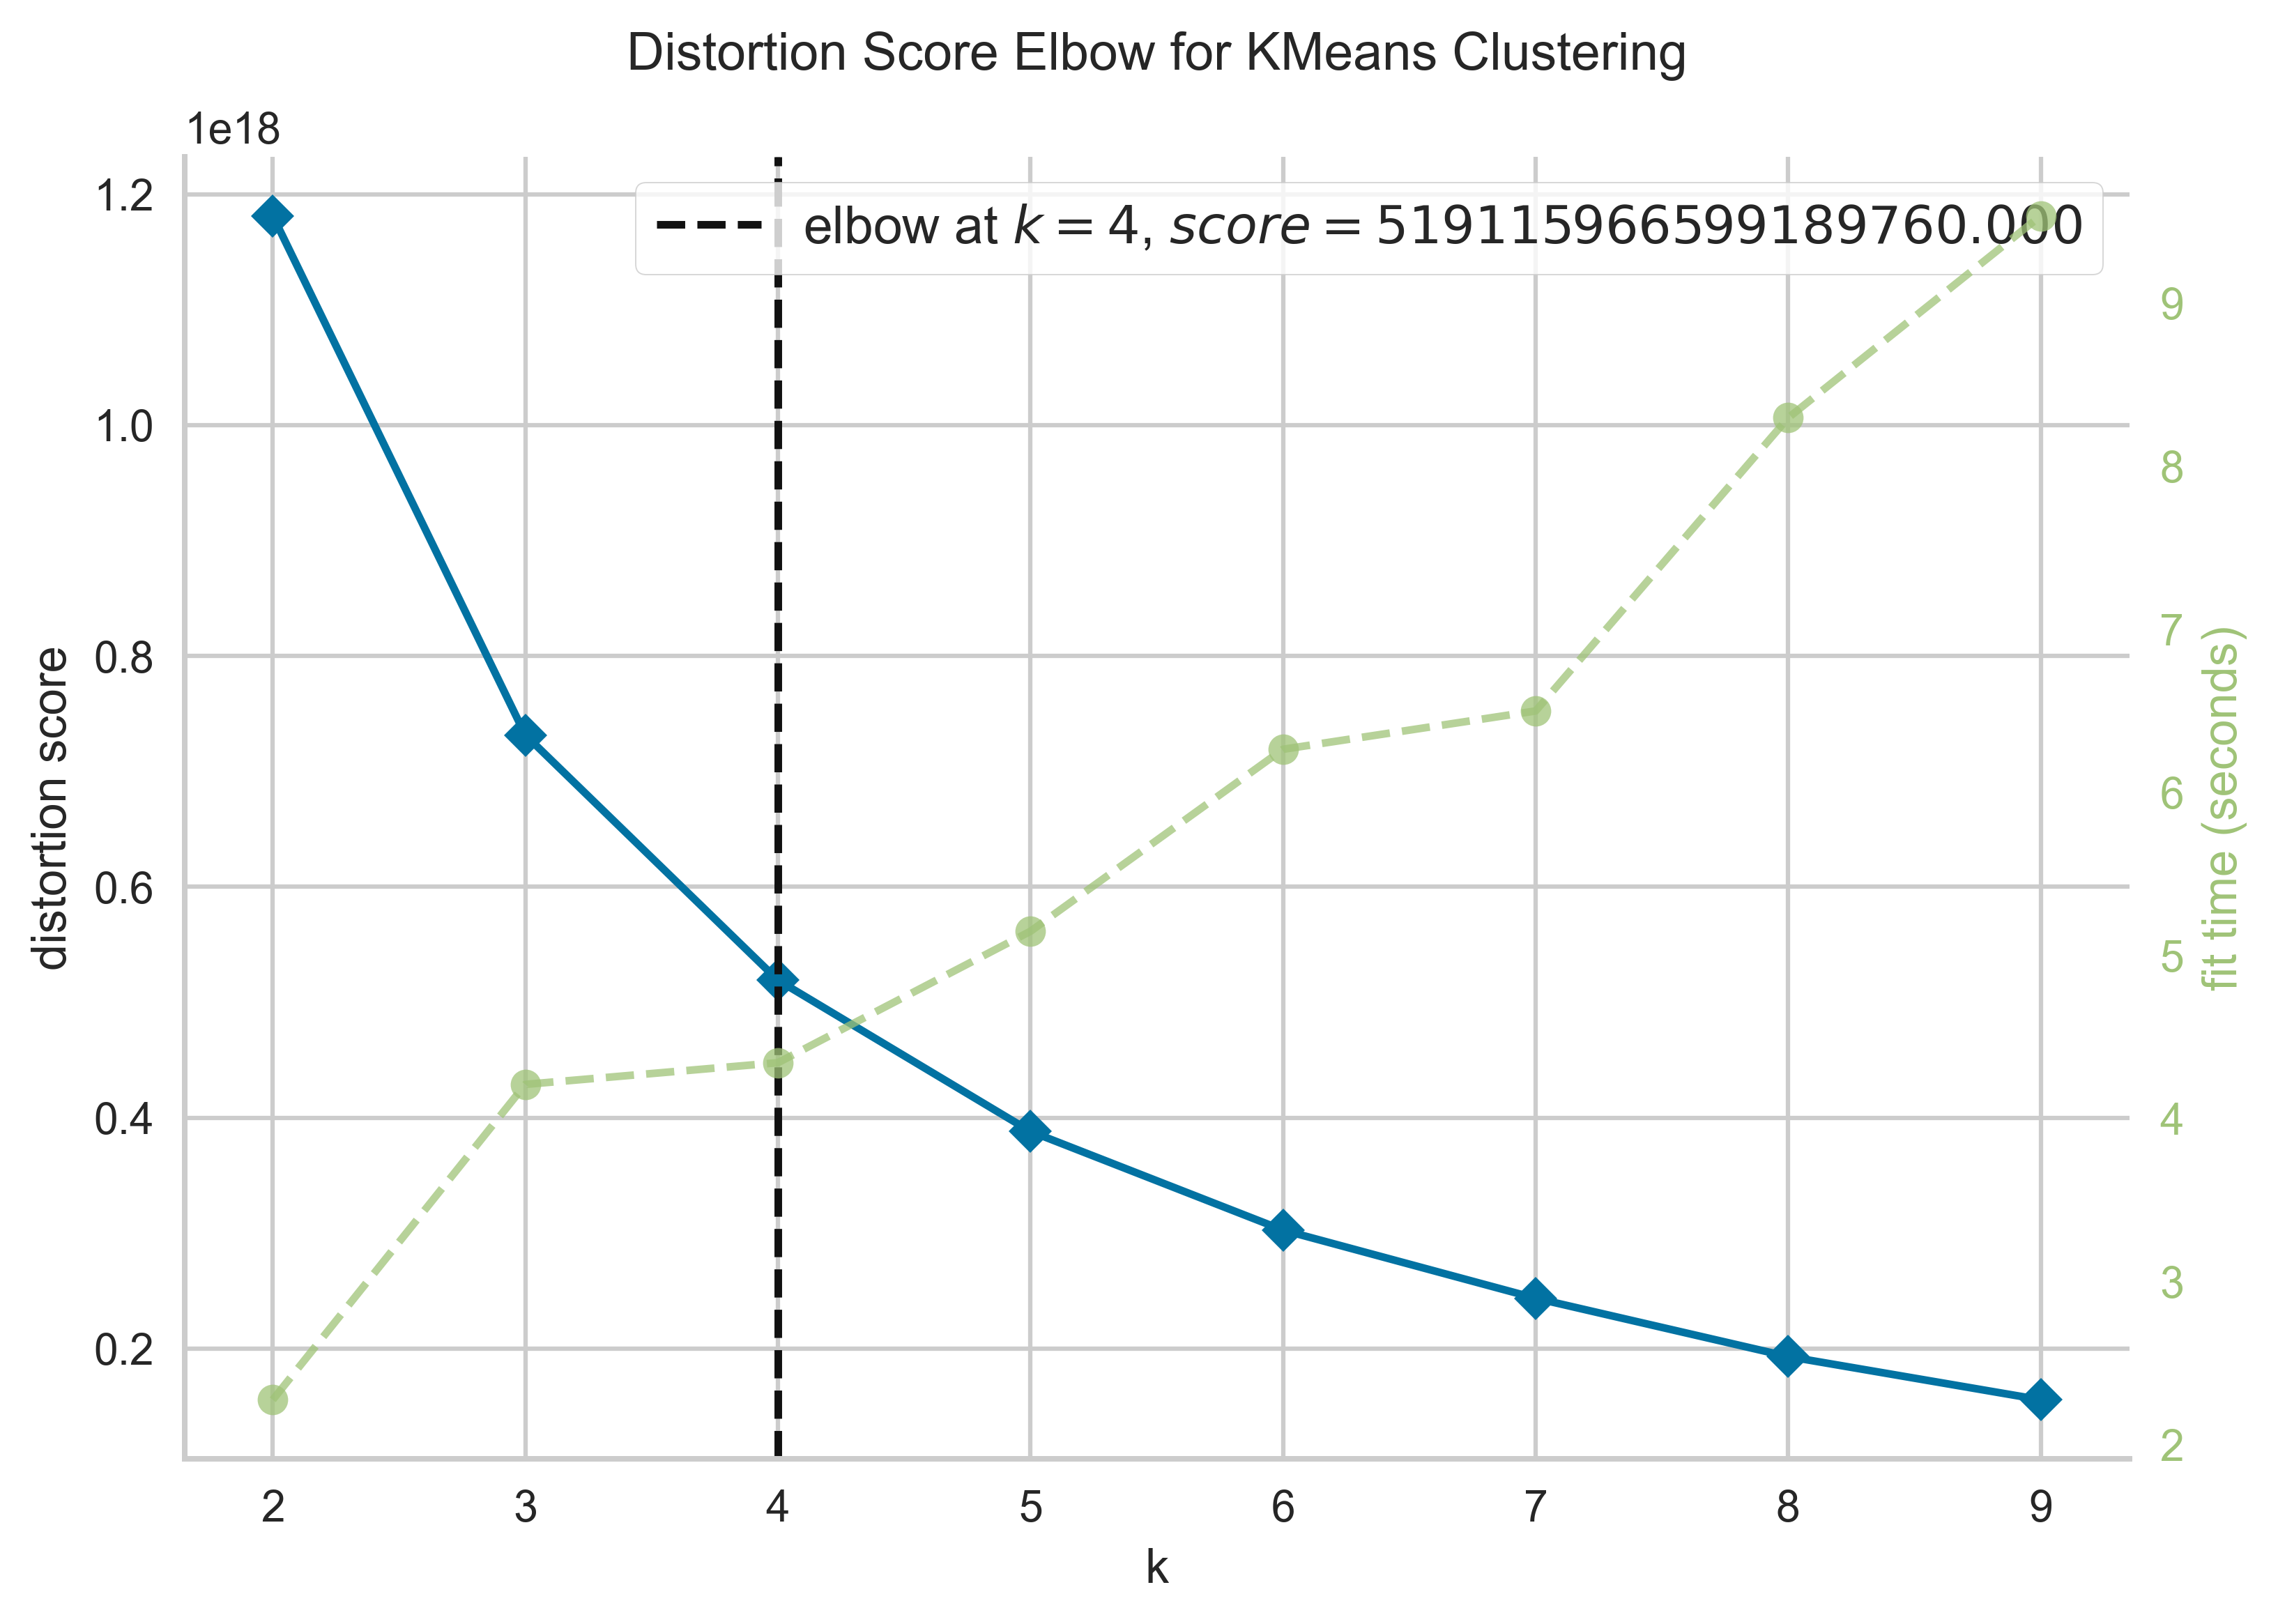

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
Kmean = KMeans(n_clusters=10)
visualizer = KElbowVisualizer(Kmean, k=(2,10))
visualizer.fit(coords)
visualizer.show()

In [7]:
merge_order.head(1)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB
0,1,1,2019-11-13 05:30:16,1290.0,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,2,5,25


In [8]:
merge_order.columns

Index(['CARRIER_ID', 'REFERENCE_NUMBER', 'CREATED_ON_HQ', 'RATE_USD',
       'IS_OFFER_APPROVED', 'LOAD_DELIVERED_FROM_OFFER', 'ORDER_DATETIME_PST',
       'PICKUP_DEADLINE_PST', 'ORIGIN_3DIGIT_ZIP', 'DESTINATION_3DIGIT_ZIP',
       'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET',
       'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
       'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED',
       'ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS',
       'REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X',
       'DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
       'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
       'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK',
       'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'OFFER_COUNT',
       'FTL_OFFER_COUNT', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER',
       'ORGIN_DEST_COMB'],
      dtype='o

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
X = merge_order[['CARRIER_ID', "REFERENCE_NUMBER", 'RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB']]
y = merge_order[['OFFER_COUNT']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

### Decision Tree (number of offers)

In [300]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

In [301]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

classifiers = []
classifiers_name = ["Decision Tree", "Ridge", "Lasso", "XGBoost Regressor"]
mses = []

decision_tree = DecisionTreeClassifier()
classifiers.append(decision_tree)

ridge = Ridge()
classifiers.append(ridge)

lasso = Lasso()
classifiers.append(lasso)

xgboost_ = xgboost.XGBRegressor()
classifiers.append(xgboost_)

for clf in classifiers:
    pl = Pipeline(steps=[('preprocessor', preproc), (str(clf), clf)])
    
    pl.fit(X_train, y_train)
    y_preds = pl.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    mses.append(mse)
    print("MSE of %s is %s"%(clf, mse))

MSE of DecisionTreeClassifier() is 7.0462430829368605
MSE of Ridge() is 11.507021588880887
MSE of Lasso() is 12.181098168721892
MSE of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) is 9.315949805998686


In [302]:
import matplotlib.pyplot as plt

GRAY = "#EAEAEA"
GREEN = "#44741a"
BLUE = "#91C4D9"
YELLOW = "#dfc474"
RED = "#ce344f"

rc = {'axes.facecolor':GRAY,
      'figure.facecolor':GRAY,
      'axes.grid' : False,
      'grid.color': '.9',
      'font.family':'Arial',
      'font.size' : 10,
      "figure.figsize": "4.854, 3",
      "figure.dpi": 450,
      "savefig.dpi": 450,
      "axes.spines.right": False,
      "axes.spines.left": True,
      "axes.spines.bottom": True,
      "axes.spines.top": False,
      "xtick.bottom": False,
      "ytick.left": False,
      "axes.titlepad": 20,
      # "savefig.directory": os.chdir(os.path.dirname("../../plots/eda"))
      }

plt.rcParams.update(rc)


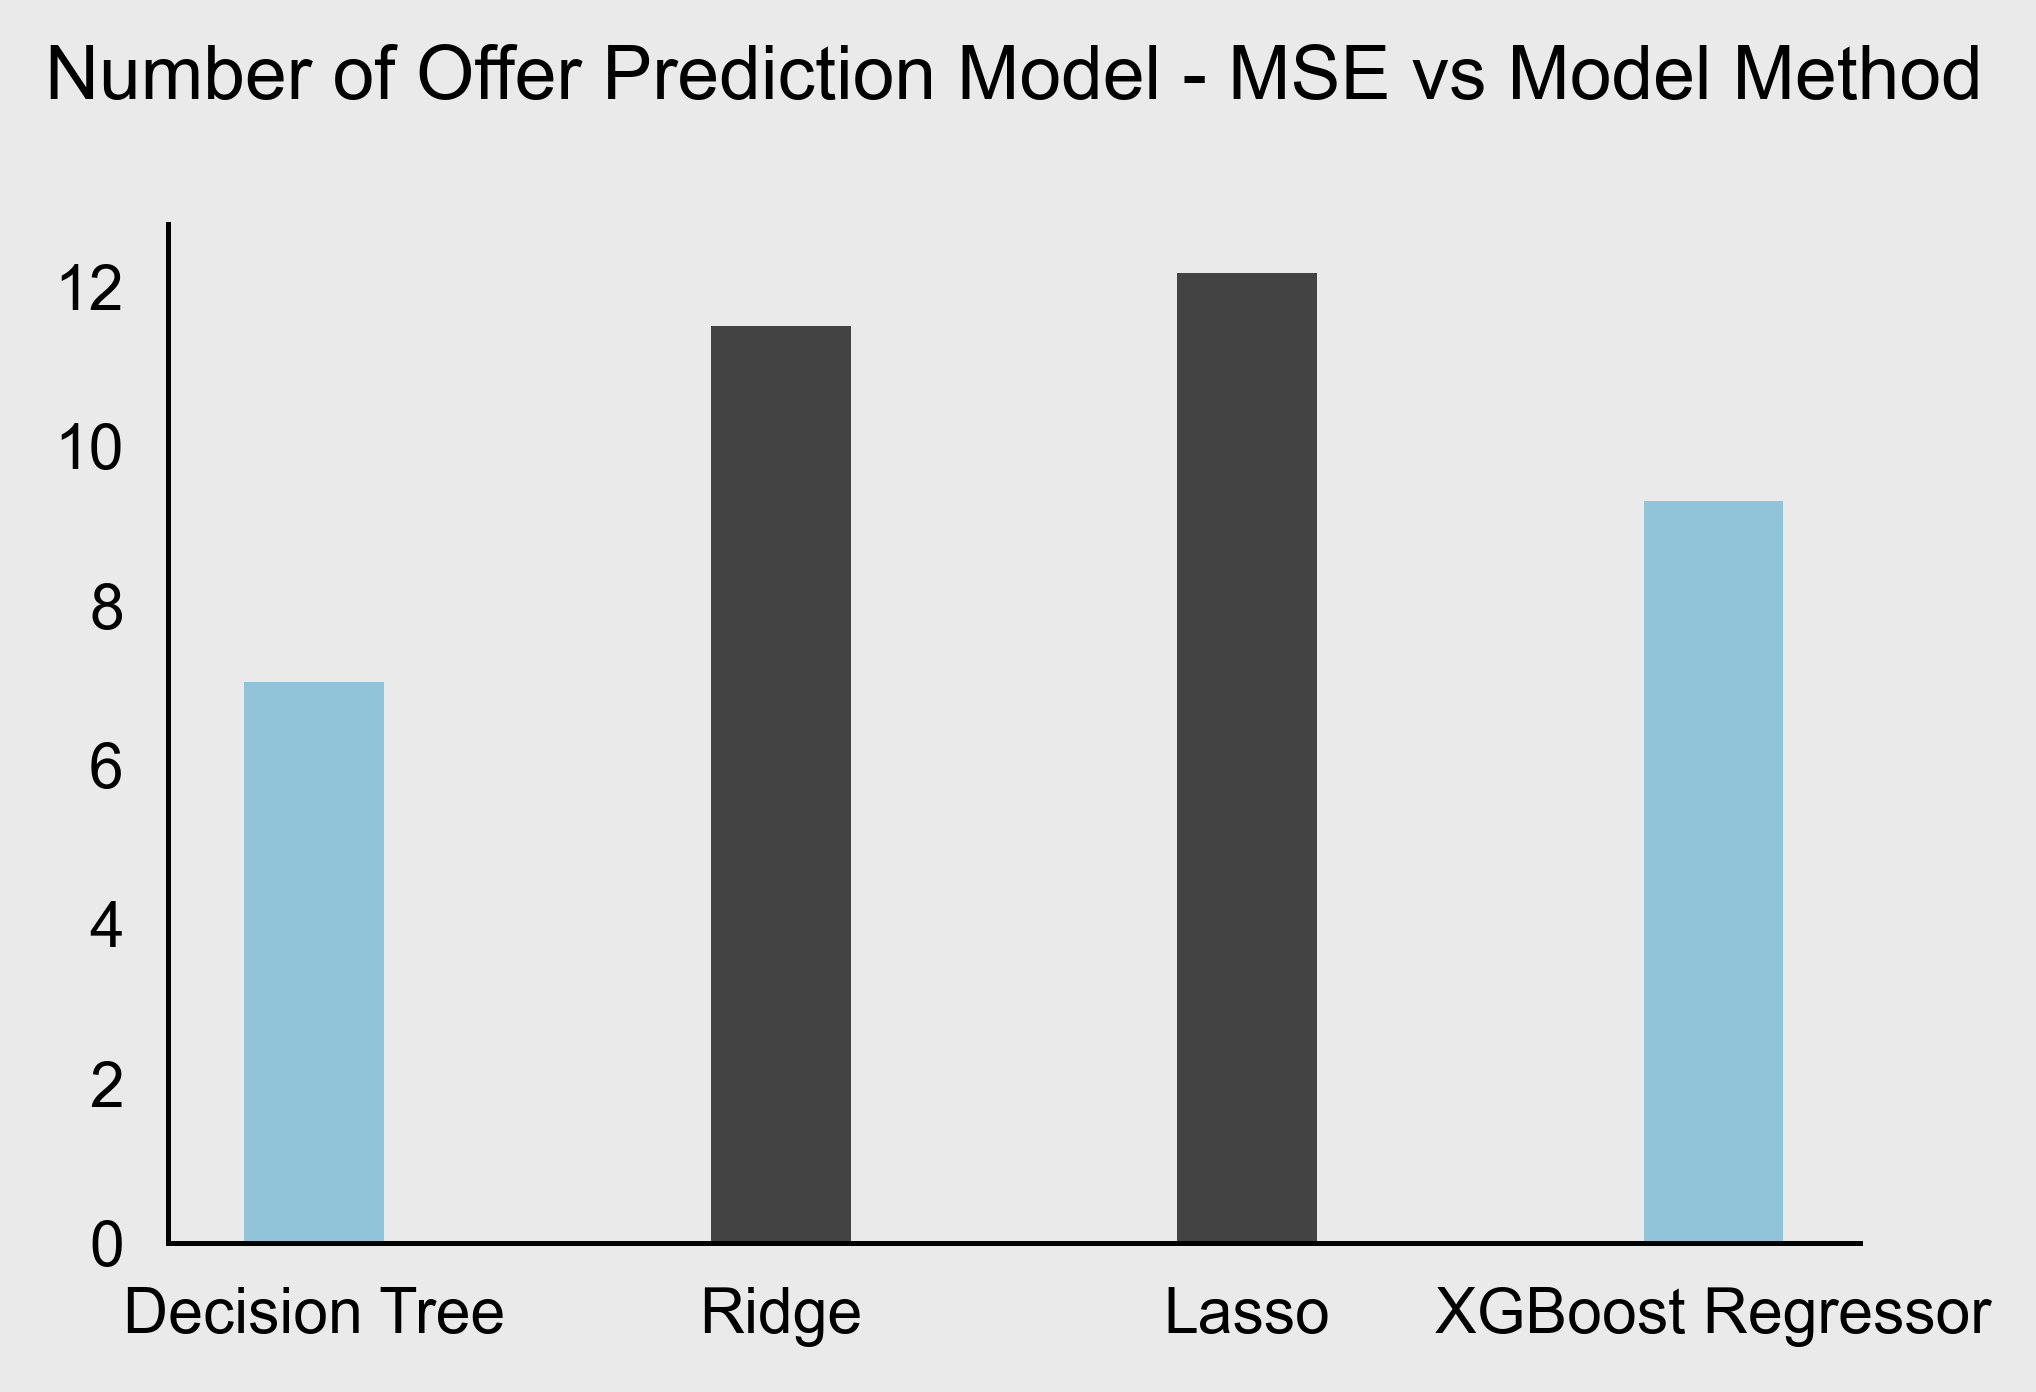

In [303]:
plt.bar(classifiers_name,mses, color = [BLUE, '#434343', '#434343'], width = 0.3)
plt.title("Number of Offer Prediction Model - MSE vs Model Method")
plt.show()

In [304]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

pl = Pipeline(steps=[('preprocessor', preproc), ('clf', DecisionTreeClassifier(max_depth=40))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['IS_OFFER_APPROVED...
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'ORDER_MONTH', 'ORDER_DAY',
                                                   'ORDER_DAY_OF_WEEK',
                                                   'ORDER_WEEK',
                                                   'DEADLINE_MONTH',
                                                   'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK', 'OFFER_IS_FTL',
                                                   'ESTIMATED_MODE_IS_FTL',
                                                   'ORIGIN_CLUSTER',
                                                   'DESTINATION_CLUTER',
                                                   'ORGIN_DEST_COMB'])])),
                ('clf', DecisionTreeClassifier(max_depth=40))])

In [305]:
y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

7.038546410401905

In [306]:
6.745636369808868 ** 0.5

2.597236294565604

In [354]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
feature_importances = pl.named_steps['clf'].feature_importances_
feature_name = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT', 
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB']


<Figure size 2700x3600 with 0 Axes>

In [355]:
feature_importances

array([6.39513552e-02, 1.29228214e-01, 8.54490288e-02, 7.60866428e-04,
       2.81047219e-03, 1.09239776e-01, 6.26924323e-02, 1.44588069e-03,
       4.73007916e-05, 6.05868443e-03, 0.00000000e+00, 9.33652806e-03,
       1.49013389e-02, 1.30091282e-02, 1.48526244e-02, 6.03538140e-02,
       1.68549699e-02, 3.34376844e-02, 1.45657617e-02, 5.92008328e-02,
       1.68387588e-02, 3.14473049e-02, 1.40119977e-02, 4.20319052e-02,
       1.70703001e-02, 2.99787038e-02, 4.53785897e-03, 2.19535982e-03,
       2.33264004e-02, 5.02123875e-02, 7.01523294e-02])

In [356]:
dict_feature = {}
for i in range(len(feature_name)):
    dict_feature[feature_name[i]] = feature_importances[i]

dict_feature = sorted(dict_feature.items(), key=lambda x:x[1], reverse= True)

dict_feature1 = dict_feature[0:10]
dict_feature2 = dict_feature[22:27]

dict_feature = dict_feature1 + dict_feature2

In [357]:
dict_feature

[('APPROXIMATE_DRIVING_ROUTE_MILEAGE', 0.12922821399932108),
 ('GIVEN_HOURS', 0.10923977625303061),
 ('PALLETIZED_LINEAR_FEET', 0.0854490287551778),
 ('ORGIN_DEST_COMB', 0.07015232942692154),
 ('RATE_USD', 0.0639513551812999),
 ('REMAINING_HOURS', 0.06269243232077254),
 ('ORDER_DAY', 0.06035381396237167),
 ('DEADLINE_DAY', 0.05920083284814096),
 ('DESTINATION_CLUTER', 0.05021238751949536),
 ('OFFER_DAY', 0.042031905242805354),
 ('REEFER_ALLOWED', 0.009336528055275024),
 ('EXCLUSIVE_USE_REQUESTED', 0.006058684432627325),
 ('OFFER_IS_FTL', 0.004537858967104601),
 ('DEADLINE_ON_WEEKDAY', 0.002810472192384829),
 ('ESTIMATED_MODE_IS_FTL', 0.002195359817118106)]

In [358]:
feature_name = []
feature_importances = []
for key,value in dict_feature:
    feature_name.append(key)
    feature_importances.append(value)

In [359]:
feature_name[0] = 'APPROXI_ROUTE_MILE'
feature_name

['APPROXI_ROUTE_MILE',
 'GIVEN_HOURS',
 'PALLETIZED_LINEAR_FEET',
 'ORGIN_DEST_COMB',
 'RATE_USD',
 'REMAINING_HOURS',
 'ORDER_DAY',
 'DEADLINE_DAY',
 'DESTINATION_CLUTER',
 'OFFER_DAY',
 'REEFER_ALLOWED',
 'EXCLUSIVE_USE_REQUESTED',
 'OFFER_IS_FTL',
 'DEADLINE_ON_WEEKDAY',
 'ESTIMATED_MODE_IS_FTL']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'APPROXI_ROUTE_MILE'),
  Text(0, 1, 'GIVEN_HOURS'),
  Text(0, 2, 'PALLETIZED_LINEAR_FEET'),
  Text(0, 3, 'ORGIN_DEST_COMB'),
  Text(0, 4, 'RATE_USD'),
  Text(0, 5, 'REMAINING_HOURS'),
  Text(0, 6, 'ORDER_DAY'),
  Text(0, 7, 'DEADLINE_DAY'),
  Text(0, 8, 'DESTINATION_CLUTER'),
  Text(0, 9, 'OFFER_DAY'),
  Text(0, 10, 'REEFER_ALLOWED'),
  Text(0, 11, 'EXCLUSIVE_USE_REQUESTED'),
  Text(0, 12, 'OFFER_IS_FTL'),
  Text(0, 13, 'DEADLINE_ON_WEEKDAY'),
  Text(0, 14, 'ESTIMATED_MODE_IS_FTL')])

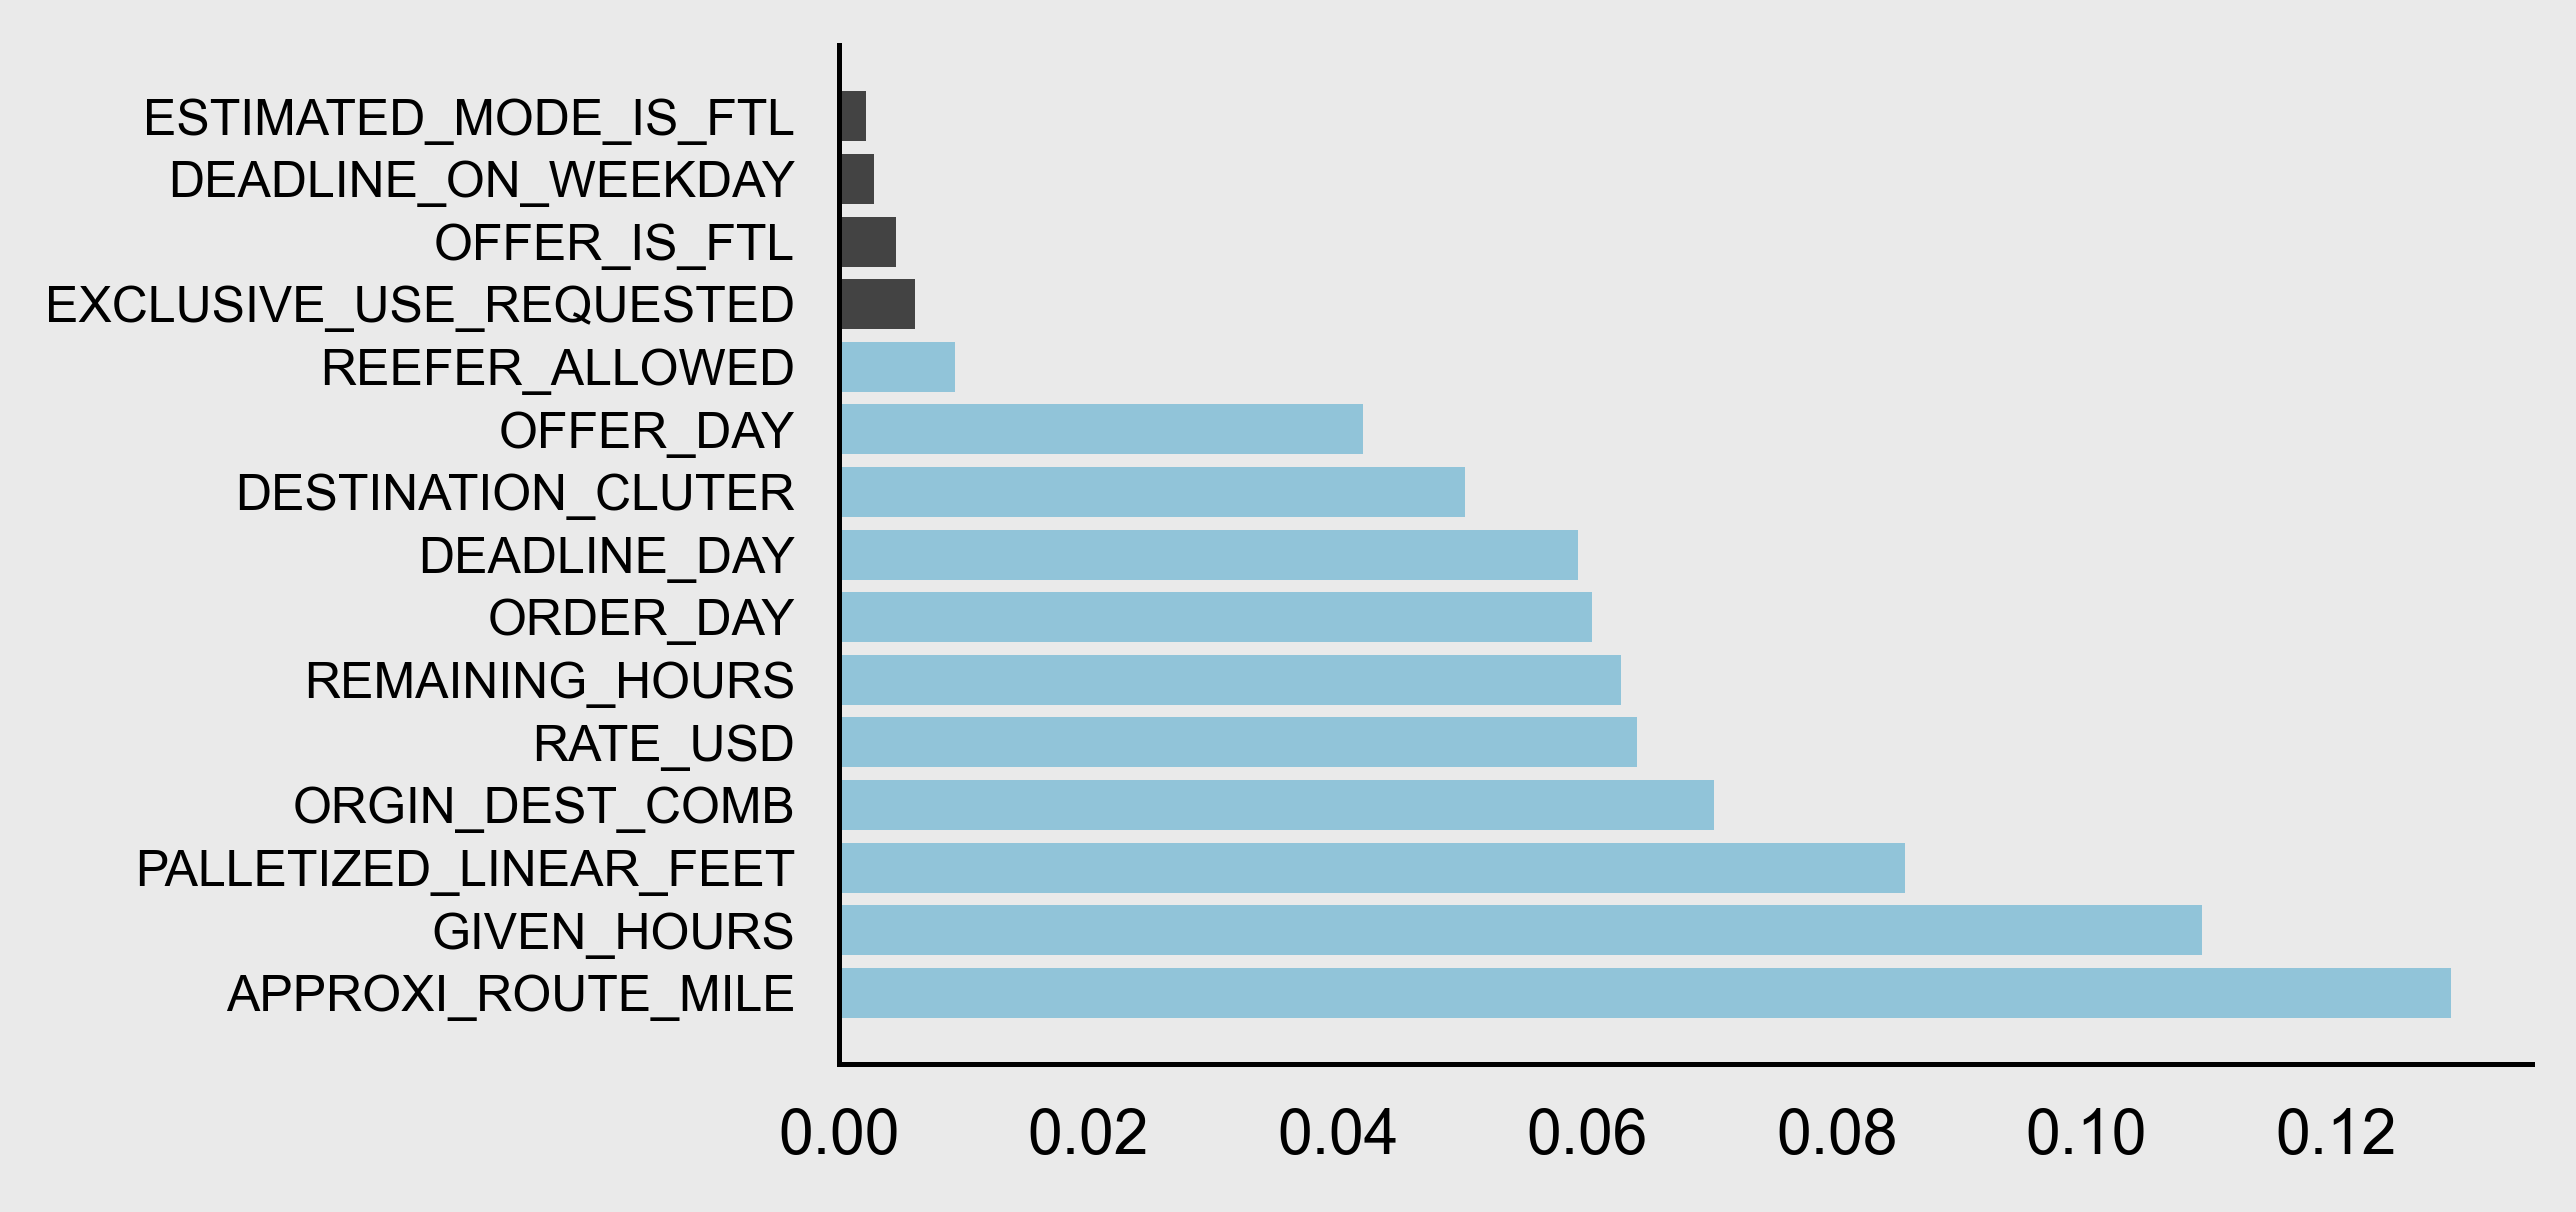

In [360]:
col = []
for coef in feature_importances:
    if coef > 0.009:
      col.append(BLUE)
    else:
      col.append("#434343")

plt.barh(feature_name,feature_importances, align='center', color = col)
plt.yticks(fontsize = 8)

In [190]:
pl.named_steps['clf'].tree_.max_depth

40

'RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET',
'GIVEN_HOURS','REMAINING_HOURS'
'IS_OFFER_APPROVED','EXCLUSIVE_USE_REQUESTED', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB'

In [46]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', "PALLETIZED_LINEAR_FEET", "GIVEN_HOURS", "REMAINING_HOURS"]
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['EXCLUSIVE_USE_REQUESTED', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 
            'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 
            'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


pl = Pipeline(steps=[('preprocessor', preproc), ('clf', DecisionTreeClassifier(max_depth=40))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['EXCLUSIVE_USE_REQUESTED',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT_TRUC...
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'ORDER_MONTH', 'ORDER_DAY',
                                                   'ORDER_DAY_OF_WEEK',
                                                   'ORDER_WEEK',
                                                   'DEADLINE_MONTH',
                                                   'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK', 'OFFER_IS_FTL',
                                                   'ESTIMATED_MODE_IS_FTL',
                                                   'ORIGIN_CLUSTER',
                                                   'DESTINATION_CLUTER',
                                                   'ORGIN_DEST_COMB'])])),
                ('clf', DecisionTreeClassifier(max_depth=40))])

In [47]:
from sklearn.metrics import mean_squared_error

y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

3.795686565499314

In [48]:
pl.named_steps['clf'].tree_.max_depth

40

In [20]:
parameters = {
    'max_depth': [1, 5, 10, 20, 30, 40], 
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[2,3,5,10]
}

In [75]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', "PALLETIZED_LINEAR_FEET", "GIVEN_HOURS", "REMAINING_HOURS"]
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['EXCLUSIVE_USE_REQUESTED', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 
            'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 
            'OFFER_WEEK', 'OFFER_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])


preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


pl = Pipeline(steps=[('preprocessor', preproc), ('clf', GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['IS_OFFER_APPROVED',
                                                   'EXCLUSIVE_...
                                                   'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK', 'OFFER_IS_FTL',
                                                   'ORIGIN_CLUSTER',
                                                   'DESTINATION_CLUTER',
                                                   'ORGIN_DEST_COMB'])])),
                ('clf',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [1, 5, 10, 20, 30, 40],
                                          'min_samples_leaf': [2, 3, 5, 10],
                                          'min_samples_split': [2, 3, 5,
                                                                10]}))])

In [78]:
pl.named_steps['clf'].best_params_

{'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [79]:
y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

8.710067752057538

In [11]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', "PALLETIZED_LINEAR_FEET", "GIVEN_HOURS", "REMAINING_HOURS"]
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['EXCLUSIVE_USE_REQUESTED', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 
            'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 
            'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])


preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


pl = Pipeline(steps=[('preprocessor', preproc), ('clf', DecisionTreeClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=2))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['EXCLUSIVE_USE_REQUESTED',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT_TRUC...
                                                   'ORDER_MONTH', 'ORDER_DAY',
                                                   'ORDER_DAY_OF_WEEK',
                                                   'ORDER_WEEK',
                                                   'DEADLINE_MONTH',
                                                   'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK', 'OFFER_IS_FTL',
                                                   'ESTIMATED_MODE_IS_FTL',
                                                   'ORIGIN_CLUSTER',
                                                   'DESTINATION_CLUTER',
                                                   'ORGIN_DEST_COMB'])])),
                ('clf',
                 DecisionTreeClassifier(max_depth=40, min_samples_leaf=2))])

In [12]:
y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

5.4269010102185815

In [13]:
5.51978001193057 ** 0.5

2.3494212078574948

In [14]:
pl.predict(X_test)

array([11,  1,  3, ...,  7,  6,  6], dtype=int64)

In [15]:
X_test['PREDICTED_OFFER_COUNT'] = pl.predict(X_test)
X_test['OFFER_COUNT'] = y_test

In [16]:
X_test.sort_values("REFERENCE_NUMBER")

,CARRIER_ID,REFERENCE_NUMBER,RATE_USD,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,LOAD_BAR_COUNT,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,IS_OFFER_APPROVED,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_TO_RIDE_REQUESTED,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB,PREDICTED_OFFER_COUNT,OFFER_COUNT
5,6,2,2838.000,682.0,32.0,0.0,1,96.0,5.0,0,1,0,0,1,1,0,12,2,4,49,12,6,4,49,12,6,4,49,1,0,2,5,25,6,6
6,7,2,2064.000,682.0,32.0,0.0,1,96.0,4.0,0,1,0,0,1,1,0,12,2,4,49,12,6,4,49,12,6,4,49,1,0,2,5,25,4,6
4,5,2,3870.000,682.0,32.0,0.0,1,96.0,5.0,0,1,0,0,1,1,0,12,2,4,49,12,6,4,49,12,6,4,49,1,0,2,5,25,6,6
8,9,3,1483.500,682.0,16.0,0.0,1,48.0,24.0,0,1,0,0,1,1,1,3,17,2,12,3,19,2,12,3,18,2,12,0,0,2,5,25,2,2
13,13,6,2967.000,1283.0,12.0,0.0,1,24.0,3.0,0,1,0,0,1,1,0,12,3,4,49,12,4,4,49,12,4,4,49,1,0,2,5,25,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687303,13330,186211,1548.000,406.0,52.0,0.0,1,139.0,3.0,1,1,0,0,0,0,0,5,12,2,19,5,18,2,20,5,18,2,20,1,1,6,2,62,9,9
687299,4342,186211,1257.750,406.0,52.0,0.0,1,139.0,20.0,1,1,0,0,0,0,0,5,12,1,19,5,18,1,20,5,17,1,20,1,1,6,2,62,9,9
687300,13330,186211,1741.500,406.0,52.0,0.0,1,139.0,4.0,0,1,0,0,0,0,0,5,12,2,19,5,18,2,20,5,18,2,20,1,1,6,2,62,9,9
687304,12423,186212,7659.375,2455.0,30.0,0.0,1,29.0,25.0,1,1,0,0,0,0,0,6,23,2,25,6,24,2,25,6,23,2,25,0,0,6,4,64,4,5


<AxesSubplot: ylabel='Proportion'>

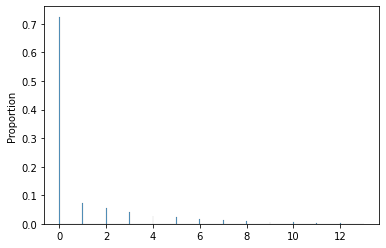

In [17]:
import matplotlib.pyplot as plt

GRAY = "#EAEAEA"
GREEN = "#44741a"
BLUE = "#91C4D9"
YELLOW = "#dfc474"
RED = "#ce344f"

rc = {'axes.facecolor':GRAY,
      'figure.facecolor':GRAY,
      'axes.grid' : False,
      'grid.color': '.9',
      'font.family':'Arial',
      'font.size' : 10,
      "figure.figsize": "4.854, 3",
      "figure.dpi": 450,
      "savefig.dpi": 450,
      "axes.spines.right": False,
      "axes.spines.left": True,
      "axes.spines.bottom": True,
      "axes.spines.top": False,
      "xtick.bottom": False,
      "ytick.left": False,
      "axes.titlepad": 20,
      # "savefig.directory": os.chdir(os.path.dirname("../../plots/eda"))
      }

import seaborn as sns
sns.histplot(stat = "proportion", data = abs(X_test['PREDICTED_OFFER_COUNT'] - X_test['OFFER_COUNT']))

In [18]:
merge_order["PREDICTED_OFFER_COUNT"] = pl.predict(merge_order)
merge_order

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB,PREDICTED_OFFER_COUNT
0,1,1,2019-11-13 05:30:16,1290.000,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,2,5,25,6
1,2,2,2019-12-06 08:43:01,2709.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6
2,3,2,2019-12-06 08:45:31,3225.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6
3,4,2,2019-12-06 08:48:09,2580.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,4
4,5,2,2019-12-06 08:49:46,3870.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687305,1688,186212,2021-06-24 05:56:38,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,6,4,64,5
687306,1688,186212,2021-06-24 06:00:00,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5
687307,570,186212,2021-06-24 06:06:34,7659.375,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5
687308,570,186212,2021-06-24 06:06:53,7256.250,1,1,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5


### Estimated minimum cost

In [19]:
gr = merge_order.sort_values(["REFERENCE_NUMBER", "CREATED_ON_HQ"]).groupby("REFERENCE_NUMBER")
merge_order["N_OFFER"] = gr.cumcount()
merge_order

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB,PREDICTED_OFFER_COUNT,N_OFFER
0,1,1,2019-11-13 05:30:16,1290.000,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,2,5,25,6,0
1,2,2,2019-12-06 08:43:01,2709.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,0
2,3,2,2019-12-06 08:45:31,3225.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,1
3,4,2,2019-12-06 08:48:09,2580.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,4,2
4,5,2,2019-12-06 08:49:46,3870.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687305,1688,186212,2021-06-24 05:56:38,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,6,4,64,5,1
687306,1688,186212,2021-06-24 06:00:00,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,2
687307,570,186212,2021-06-24 06:06:34,7659.375,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,3
687308,570,186212,2021-06-24 06:06:53,7256.250,1,1,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,4


In [20]:
min_rate = merge_order.groupby("REFERENCE_NUMBER").agg({"RATE_USD":"min"})
min_rate = min_rate.reset_index().rename(columns = {"RATE_USD":"MIN_RATE"})
merge_order = merge_order.merge(min_rate, on = "REFERENCE_NUMBER")
merge_order

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB,PREDICTED_OFFER_COUNT,N_OFFER,MIN_RATE
0,1,1,2019-11-13 05:30:16,1290.000,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,2,5,25,6,0,1290.00
1,2,2,2019-12-06 08:43:01,2709.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,0,2064.00
2,3,2,2019-12-06 08:45:31,3225.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,1,2064.00
3,4,2,2019-12-06 08:48:09,2580.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,4,2,2064.00
4,5,2,2019-12-06 08:49:46,3870.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,3,2064.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687305,1688,186212,2021-06-24 05:56:38,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,6,4,64,5,1,7256.25
687306,1688,186212,2021-06-24 06:00:00,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,2,7256.25
687307,570,186212,2021-06-24 06:06:34,7659.375,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,3,7256.25
687308,570,186212,2021-06-24 06:06:53,7256.250,1,1,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,4,7256.25


In [21]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
import xgboost
from sklearn.model_selection import train_test_split

In [22]:
len(merge_order.columns)

49

In [23]:
X = merge_order[['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT', 'FTL_OFFER_COUNT', 
                 "PREDICTED_OFFER_COUNT", 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 
                 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
                 'STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
                 'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 
                 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 
                 'DESTINATION_CLUTER','ORGIN_DEST_COMB']]
y = merge_order[['MIN_RATE']]

In [24]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT', 'FTL_OFFER_COUNT', 
            "PREDICTED_OFFER_COUNT", 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
            'STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
            'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 
            'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 
            'DESTINATION_CLUTER','ORGIN_DEST_COMB']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

In [259]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

classifiers = []
mses = []
classifiers_name = ["Ridge", "Lasso", "BayesianRidge", "XGBoost Regressor"]

ridge = Ridge()
classifiers.append(ridge)

lasso = Lasso()
classifiers.append(lasso)

bayesianRidge = BayesianRidge()
classifiers.append(bayesianRidge)

xgboost_ = xgboost.XGBRegressor()
classifiers.append(xgboost_)

for clf in classifiers:
    pl = Pipeline(steps=[('preprocessor', preproc), (str(clf), clf)])
    
    pl.fit(X_train, y_train)
    y_preds = pl.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    mses.append(mse)
    print("MSE of %s is %s"%(clf, mse))

MSE of Ridge() is 1400435.7377432785


c:\Users\김기호\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.083e+08, tolerance: 2.025e+08
  model = cd_fast.enet_coordinate_descent(


MSE of Lasso() is 1400173.5295965234


c:\Users\김기호\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE of BayesianRidge() is 1400432.6838781652
MSE of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) is 183895.20552129383


In [262]:
classifiers_name

['Ridge', 'Lasso', 'BayesianRidge', 'XGBoost Regressor']

In [263]:
classifiers_name = ['Ridge', 'Lasso', 'Bayesian', 'XGBoostRegressor']

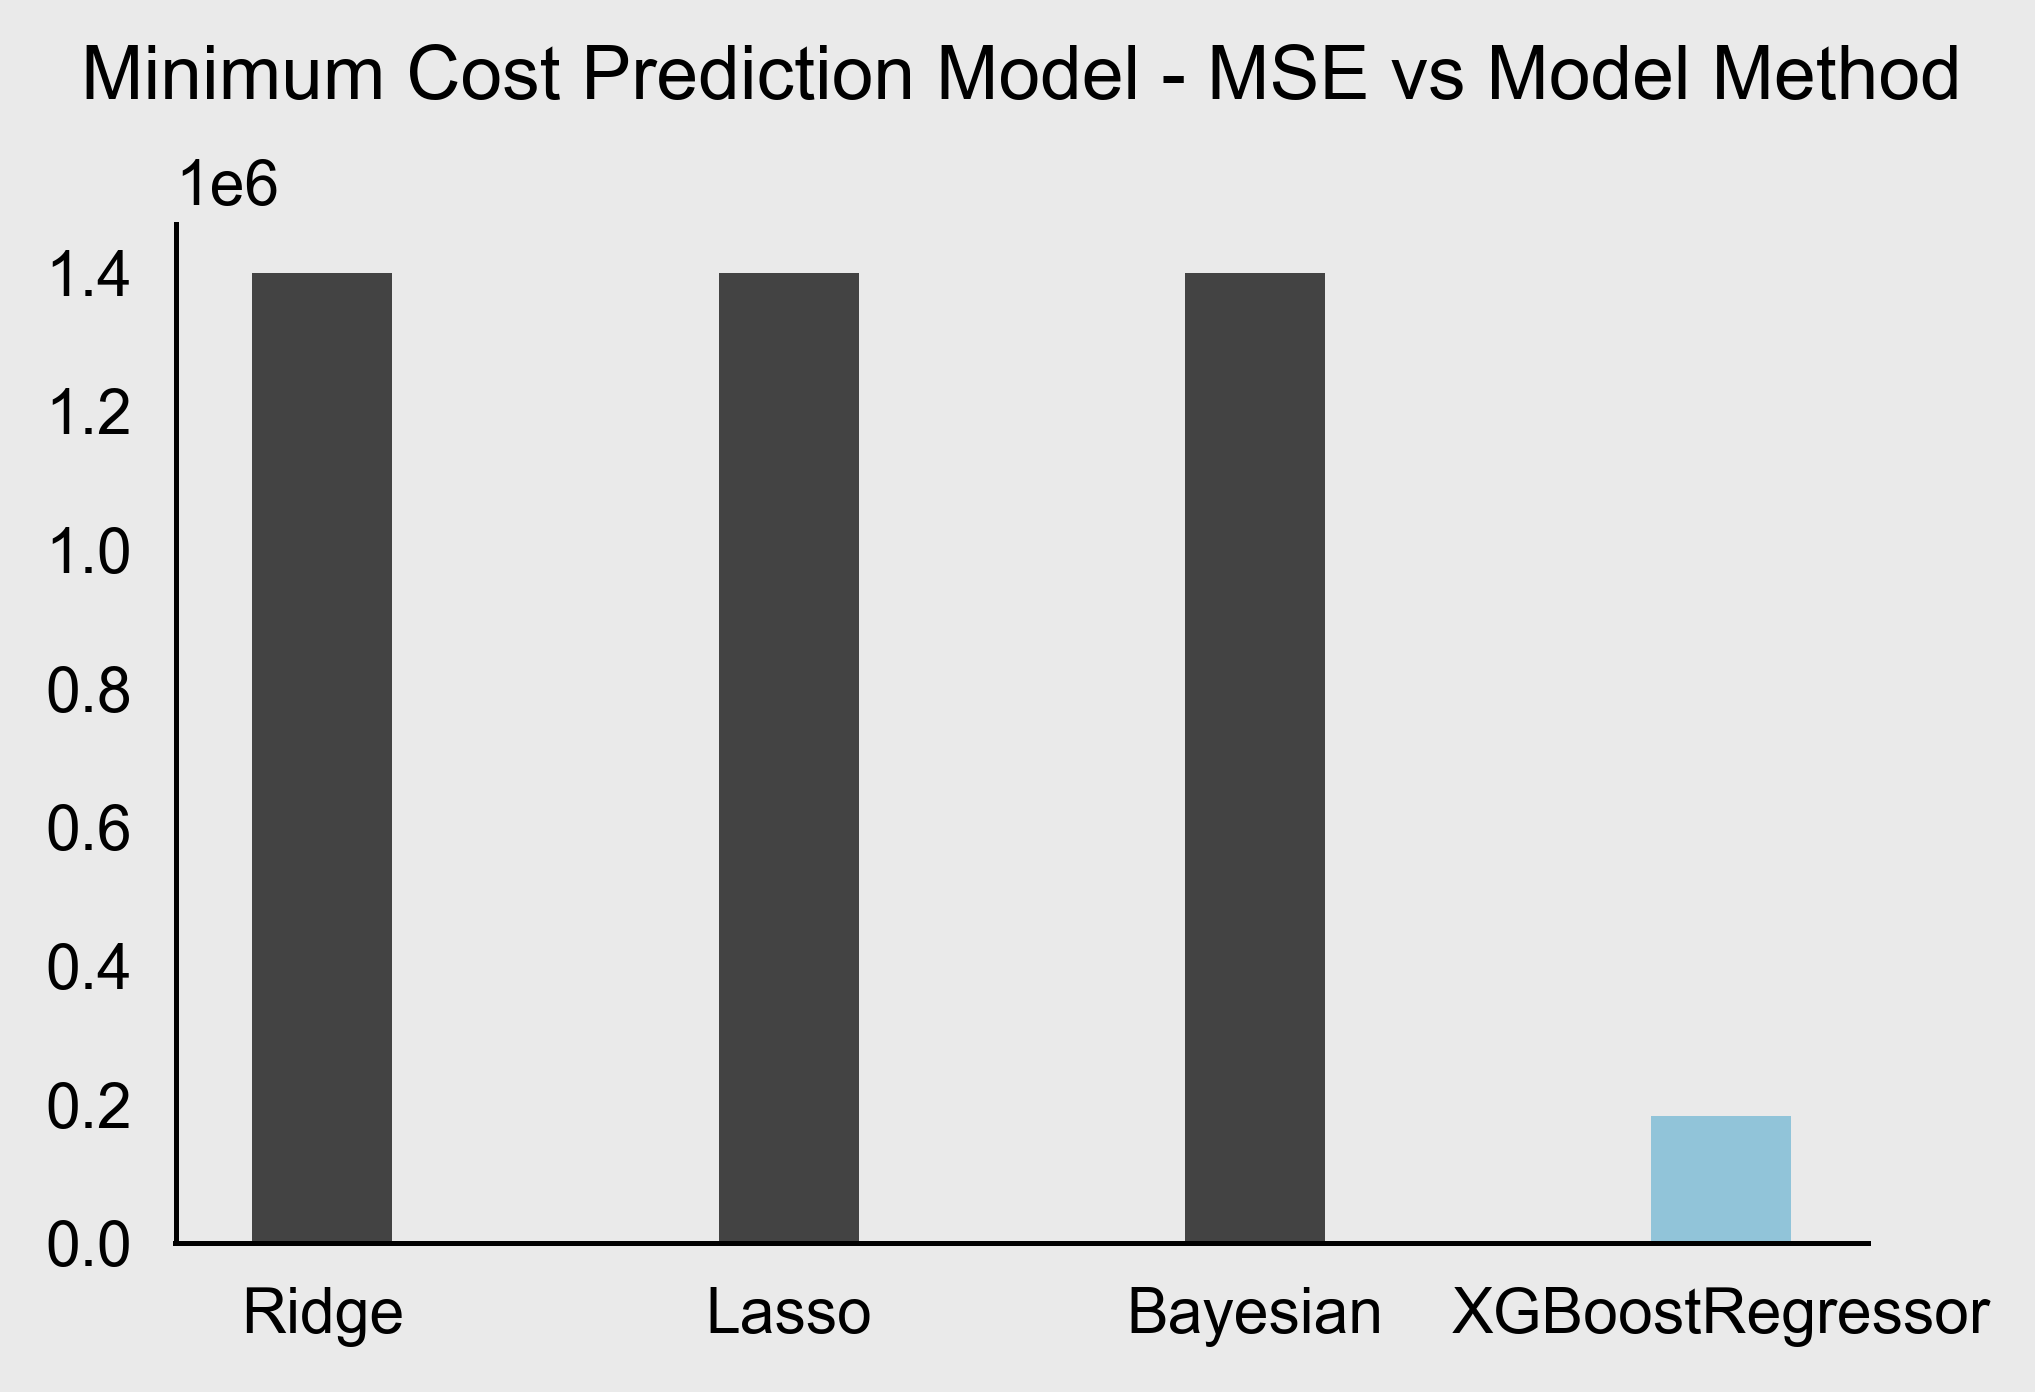

In [264]:
import matplotlib.pyplot as plt

GRAY = "#EAEAEA"
GREEN = "#44741a"
BLUE = "#91C4D9"
YELLOW = "#dfc474"
RED = "#ce344f"

rc = {'axes.facecolor':GRAY,
      'figure.facecolor':GRAY,
      'axes.grid' : False,
      'grid.color': '.9',
      'font.family':'Arial',
      'font.size' : 10,
      "figure.figsize": "4.854, 3",
      "figure.dpi": 450,
      "savefig.dpi": 450,
      "axes.spines.right": False,
      "axes.spines.left": True,
      "axes.spines.bottom": True,
      "axes.spines.top": False,
      "xtick.bottom": False,
      "ytick.left": False,
      "axes.titlepad": 20,
      # "savefig.directory": os.chdir(os.path.dirname("../../plots/eda"))
      }

plt.rcParams.update(rc)

plt.bar(classifiers_name,mses, color = ['#434343', '#434343', '#434343', BLUE], width = 0.3)
plt.title("Minimum Cost Prediction Model - MSE vs Model Method")
plt.show()

In [247]:
183934 ** 0.5

428.87527324386514

In [374]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            "PREDICTED_OFFER_COUNT", 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
            'STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
            'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 
            'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 
            'DESTINATION_CLUTER','ORGIN_DEST_COMB']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', xgboost.XGBRegressor())])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'PREDICTED_OFFER_COUNT',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder(...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [375]:
y_preds = pl.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

192132.50935237994

In [376]:
dict_feature[0:15]

[('APPROXIMATE_DRIVING_ROUTE_MILEAGE', 0.12922821399932108),
 ('GIVEN_HOURS', 0.10923977625303061),
 ('PALLETIZED_LINEAR_FEET', 0.0854490287551778),
 ('ORGIN_DEST_COMB', 0.07015232942692154),
 ('RATE_USD', 0.0639513551812999),
 ('REMAINING_HOURS', 0.06269243232077254),
 ('ORDER_DAY', 0.06035381396237167),
 ('DEADLINE_DAY', 0.05920083284814096),
 ('DESTINATION_CLUTER', 0.05021238751949536),
 ('OFFER_DAY', 0.042031905242805354),
 ('REEFER_ALLOWED', 0.009336528055275024),
 ('EXCLUSIVE_USE_REQUESTED', 0.006058684432627325),
 ('OFFER_IS_FTL', 0.004537858967104601),
 ('DEADLINE_ON_WEEKDAY', 0.002810472192384829),
 ('ESTIMATED_MODE_IS_FTL', 0.002195359817118106)]

In [377]:
feature_importances = pl.named_steps['regressor'].feature_importances_
feature_name = ['RATE_USD', 'APPROX_ROUTE_MILE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            "PREDICTED_OFFER_COUNT", 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS',
            'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
            'STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
            'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 
            'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 
            'DESTINATION_CLUTER','ORGIN_DEST_COMB']

dict_feature = {}
for i in range(len(feature_name)):
    dict_feature[feature_name[i]] = feature_importances[i]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'RATE_USD'),
  Text(0, 1, 'PALLETIZED_LINEAR_FEET'),
  Text(0, 2, 'ESTIMATED_MODE_IS_FTL'),
  Text(0, 3, 'PREDICTED_OFFER_COUNT'),
  Text(0, 4, 'APPROX_ROUTE_MILE'),
  Text(0, 5, 'DESTINATION_CLUTER'),
  Text(0, 6, 'DEADLINE_ON_WEEKDAY'),
  Text(0, 7, 'DEADLINE_MONTH'),
  Text(0, 8, 'DEADLINE_WEEK'),
  Text(0, 9, 'EXCLUSIVE_USE_REQUESTED'),
  Text(0, 10, 'ORDER_WEEK'),
  Text(0, 11, 'OFFER_WEEK'),
  Text(0, 12, 'OFFER_IS_FTL'),
  Text(0, 13, 'ORDER_MONTH'),
  Text(0, 14, 'DEADLINE_DAY')])

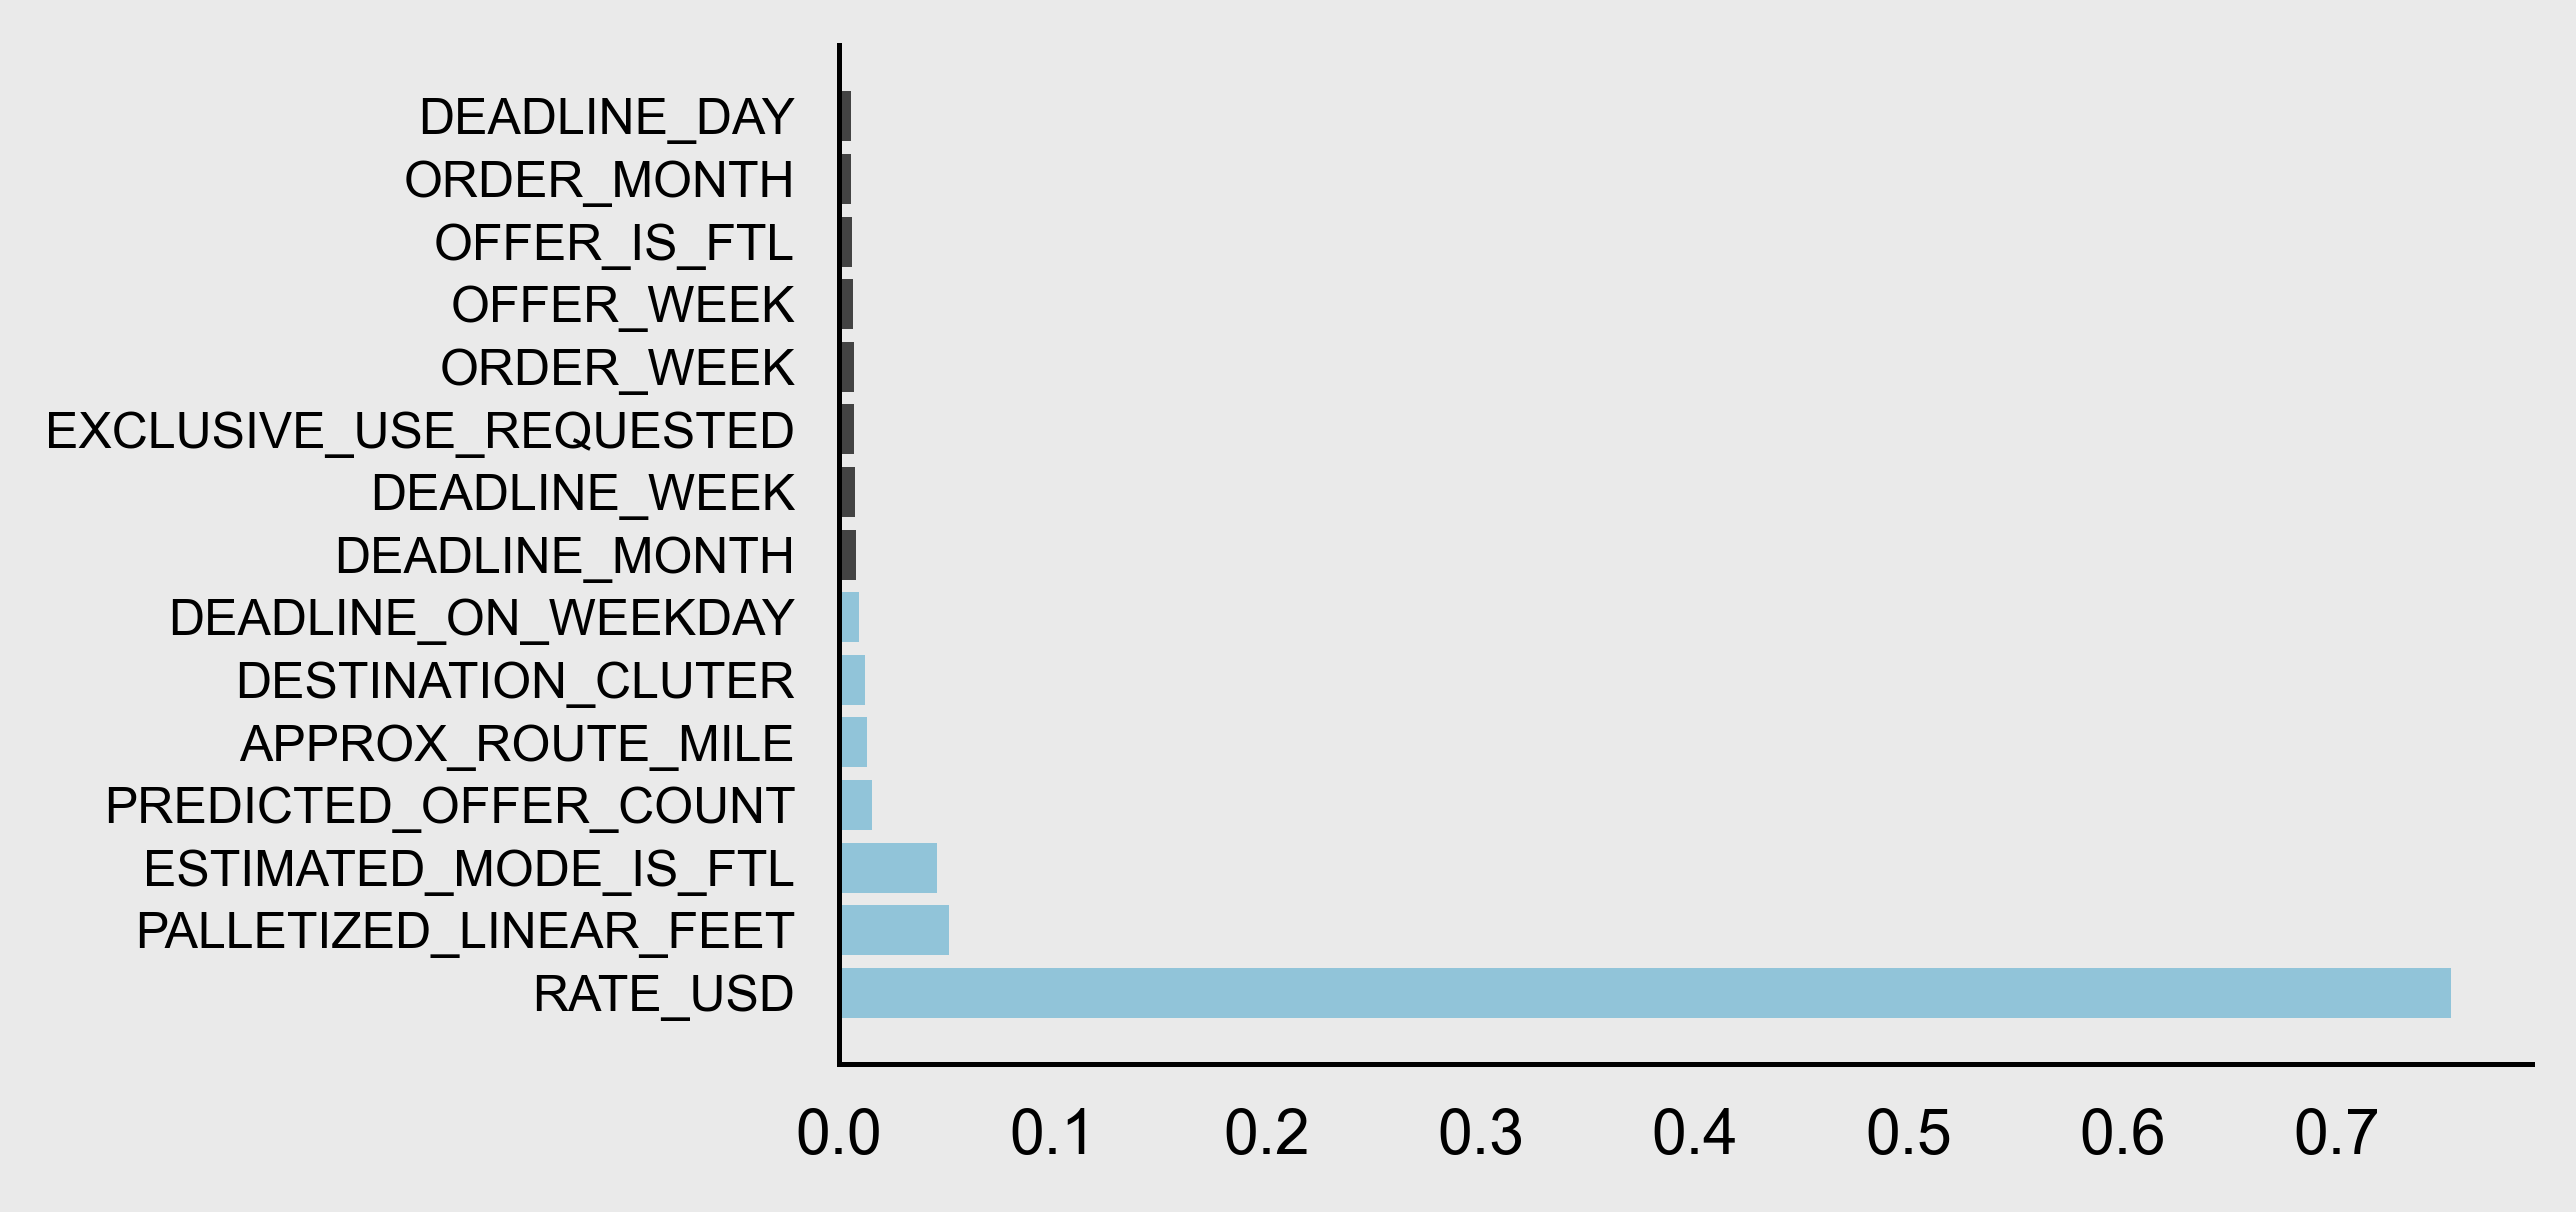

In [378]:
feature_importances = pl.named_steps['regressor'].feature_importances_
feature_name = ['RATE_USD', 'APPROX_ROUTE_MILE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            "PREDICTED_OFFER_COUNT", 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS',
            'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
            'STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
            'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 
            'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 
            'DESTINATION_CLUTER','ORGIN_DEST_COMB']

dict_feature = {}
for i in range(len(feature_name)):
    dict_feature[feature_name[i]] = feature_importances[i]


dict_feature = sorted(dict_feature.items(), key=lambda x:x[1], reverse= True)
dict_feature = dict_feature[0:15]


feature_name = []
feature_importances = []
for key,value in dict_feature:
    feature_name.append(key)
    feature_importances.append(value)

col = []
for coef in feature_importances:
    if coef > 0.009:
      col.append(BLUE)
    else:
      col.append("#434343")

plt.barh(feature_name,feature_importances, align='center', color = col)
plt.yticks(fontsize = 8)

<BarContainer object of 31 artists>

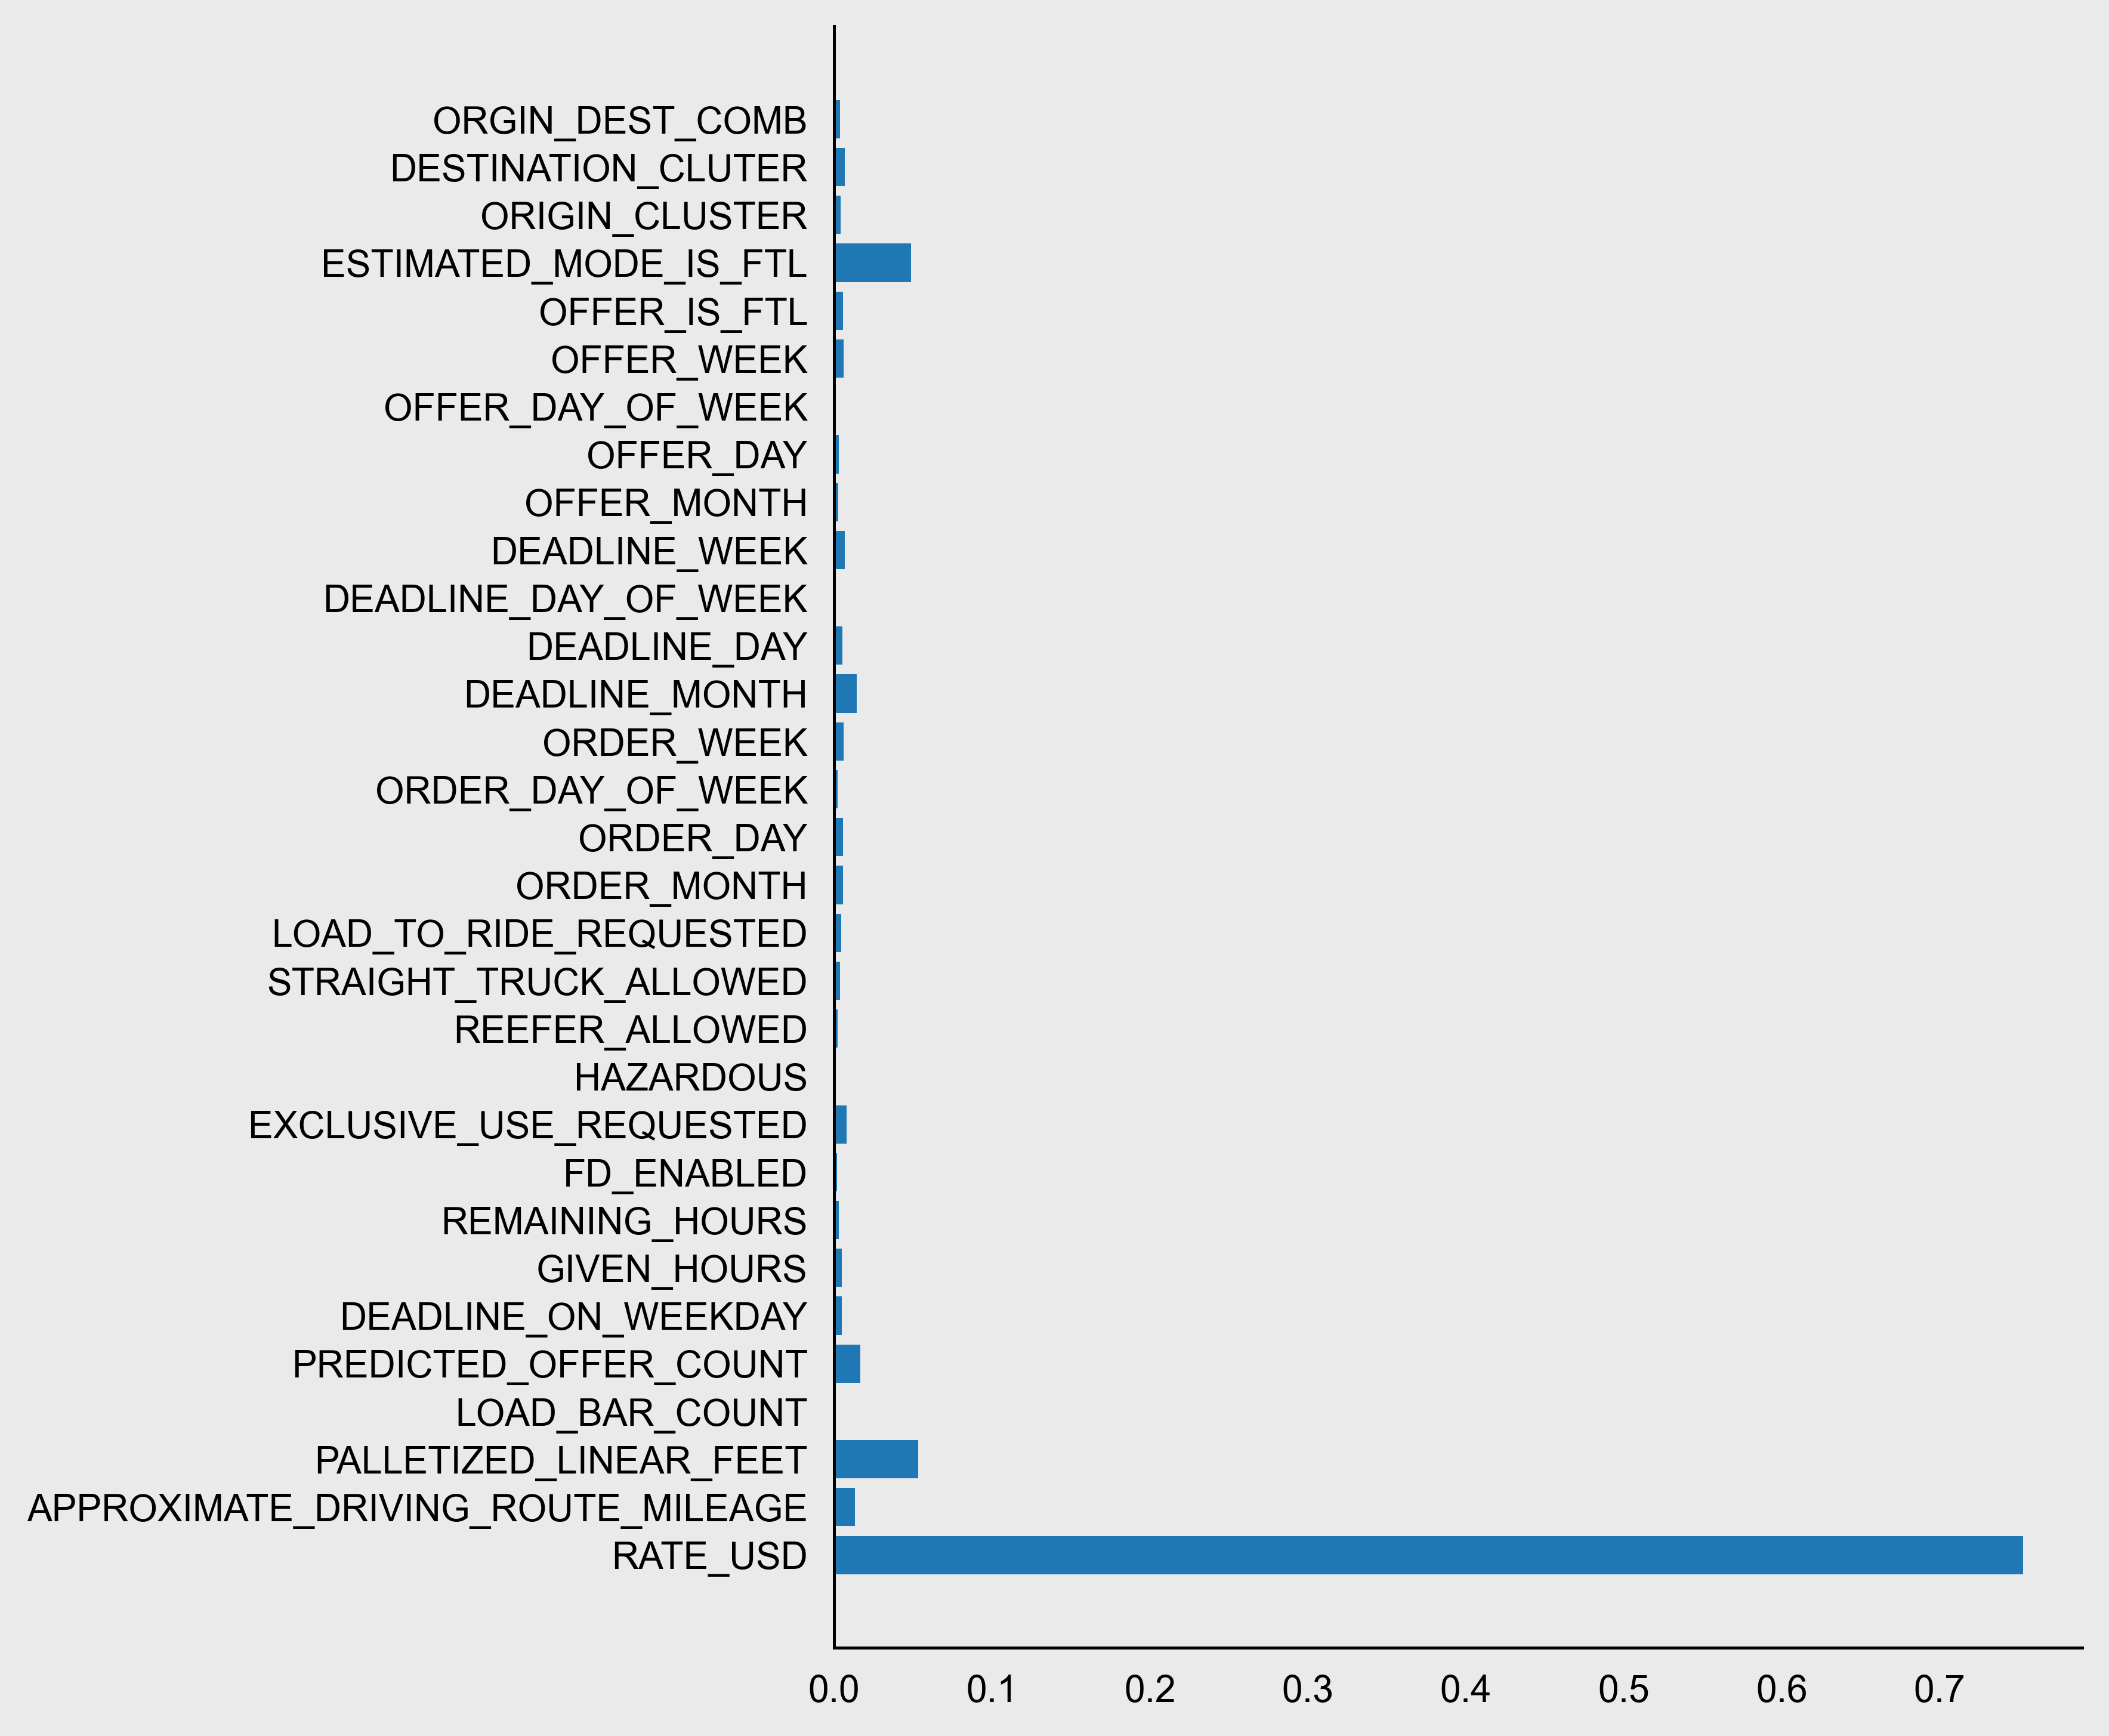

In [269]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
feature_importances = pl.named_steps['regressor'].feature_importances_
feature_name = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            "PREDICTED_OFFER_COUNT", 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS',
            'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
            'STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
            'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 
            'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 
            'DESTINATION_CLUTER','ORGIN_DEST_COMB']
plt.barh(feature_name,feature_importances, align='center',)

In [77]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'FTL_OFFER_COUNT', 
            "PREDICTED_OFFER_COUNT", 'GIVEN_HOURS']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['EXCLUSIVE_USE_REQUESTED', 'LOAD_TO_RIDE_REQUESTED',
            'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL','DESTINATION_CLUTER']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', xgboost.XGBRegressor())])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'FTL_OFFER_COUNT',
                                                   'PREDICTED_OFFER_COUNT',
                                                   'GIVEN_HOURS']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['EXCLUSIVE_USE_REQUESTED',
                                                   'LOAD_T...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [78]:
y_preds = pl.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

184378.2380654825

In [85]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'FTL_OFFER_COUNT', 
            "PREDICTED_OFFER_COUNT", 'GIVEN_HOURS']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['EXCLUSIVE_USE_REQUESTED', 'LOAD_TO_RIDE_REQUESTED',
            'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL','DESTINATION_CLUTER']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

param_grid = {
    'xgb__max_depth': [2, 3, 5, 7, 10],
    'xgb__n_estimators': [10, 100, 500],
    "xgb__reg_alpha": [0, 0.5, 1, 5],
    "xgb__reg_lambda": [0, 0.5, 1, 5]
}

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', xgboost.XGBRegressor())])

grid = GridSearchCV(
    pl,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    cv = 3,
    verbose = 3,
)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


ValueError: Invalid parameter 'xgb' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'FTL_OFFER_COUNT',
                                                   'PREDICTED_OFFER_COUNT',
                                                   'GIVEN_HOURS']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['EXCLUSIVE_USE_REQUESTED',
                                                   'LOAD_T...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
{'xgb__max_depth': 10,
 'xgb__n_estimators': 500,
 'xgb__reg_alpha': 1,
 'xgb__reg_lambda': 1}

In [24]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'FTL_OFFER_COUNT', 
            "PREDICTED_OFFER_COUNT", 'GIVEN_HOURS']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['EXCLUSIVE_USE_REQUESTED', 'LOAD_TO_RIDE_REQUESTED',
            'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL','DESTINATION_CLUTER']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', xgboost.XGBRegressor(max_depth = 10,
 n_estimators = 500,
 reg_alpha = 1,
 reg_lambda = 1))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'FTL_OFFER_COUNT',
                                                   'PREDICTED_OFFER_COUNT',
                                                   'GIVEN_HOURS']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['EXCLUSIVE_USE_REQUESTED',
                                                   'LOAD_T...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=10, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=500,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [25]:
y_preds = pl.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

88126.31698550416

In [26]:
84745 ** 0.5

291.10994486619654

In [27]:
merge_order["PREDICTED_MIN_RATE"] = pl.predict(merge_order)
merge_order

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB,PREDICTED_OFFER_COUNT,N_OFFER,MIN_RATE,PREDICTED_MIN_RATE
0,1,1,2019-11-13 05:30:16,1290.000,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,2,5,25,6,0,1290.00,1225.422607
1,2,2,2019-12-06 08:43:01,2709.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,0,2064.00,2062.425049
2,3,2,2019-12-06 08:45:31,3225.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,1,2064.00,2047.701782
3,4,2,2019-12-06 08:48:09,2580.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,4,2,2064.00,2039.584229
4,5,2,2019-12-06 08:49:46,3870.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,3,2064.00,2548.400879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687305,1688,186212,2021-06-24 05:56:38,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,6,4,64,5,1,7256.25,7246.656738
687306,1688,186212,2021-06-24 06:00:00,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,2,7256.25,7246.656738
687307,570,186212,2021-06-24 06:06:34,7659.375,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,3,7256.25,7224.562988
687308,570,186212,2021-06-24 06:06:53,7256.250,1,1,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,4,7256.25,7164.128906


### IS_MINIMUM MODEL

In [28]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
merge_order['IS_MINIMUM'] = merge_order['RATE_USD'] == merge_order['MIN_RATE']
merge_order.head(5)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB,PREDICTED_OFFER_COUNT,N_OFFER,MIN_RATE,PREDICTED_MIN_RATE,IS_MINIMUM
0,1,1,2019-11-13 05:30:16,1290.0,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,2,5,25,6,0,1290.0,1225.422607,True
1,2,2,2019-12-06 08:43:01,2709.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,0,2064.0,2062.425049,False
2,3,2,2019-12-06 08:45:31,3225.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,1,2064.0,2047.701782,False
3,4,2,2019-12-06 08:48:09,2580.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,4,2,2064.0,2039.584229,False
4,5,2,2019-12-06 08:49:46,3870.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,3,2064.0,2548.400879,False


In [30]:
merge_order.head(1)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB,PREDICTED_OFFER_COUNT,N_OFFER,MIN_RATE,PREDICTED_MIN_RATE,IS_MINIMUM
0,1,1,2019-11-13 05:30:16,1290.0,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,2,5,25,6,0,1290.0,1225.422607,True


In [31]:
X = merge_order[['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', "PREDICTED_MIN_RATE", 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB', "PREDICTED_OFFER_COUNT", "N_OFFER"]]
y = merge_order[['IS_MINIMUM']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

In [32]:
X.head(1)

,RATE_USD,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,LOAD_BAR_COUNT,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,PREDICTED_MIN_RATE,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_TO_RIDE_REQUESTED,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB,PREDICTED_OFFER_COUNT,N_OFFER
0,1290.0,682.0,20.0,0.0,1,28.0,8.0,1225.422607,1,0,0,1,1,0,11,12,2,46,11,13,2,46,11,13,2,46,1,0,2,5,25,6,0


In [79]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', "PREDICTED_MIN_RATE"]
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB', "PREDICTED_OFFER_COUNT", "N_OFFER"]
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

In [80]:
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
import xgboost

classifiers = []
mses = []
classifier_name = ["XGBClassifier", "DecisionTree", "LogisticReg"]

xgb_model = xgboost.XGBClassifier()
classifiers.append(xgb_model)

tree_model = tree.DecisionTreeClassifier()
classifiers.append(tree_model)

logistic_reg_model = LogisticRegression()
classifiers.append(logistic_reg_model)

for clf in classifiers:
    pl = Pipeline(steps=[('preprocessor', preproc), (str(clf), clf)])
    
    pl.fit(X_train, y_train)
    y_preds = pl.predict(X_test)
    acc = accuracy_score(y_preds, y_test)
    mses.append(acc)
    print("Accuracy of %s is %s"%(clf, acc))

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) is 0.7770486873948195
Accuracy of DecisionTreeClassifier() is 0.707861081608008


c:\Users\김기호\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\김기호\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression() is 0.6985009190418685


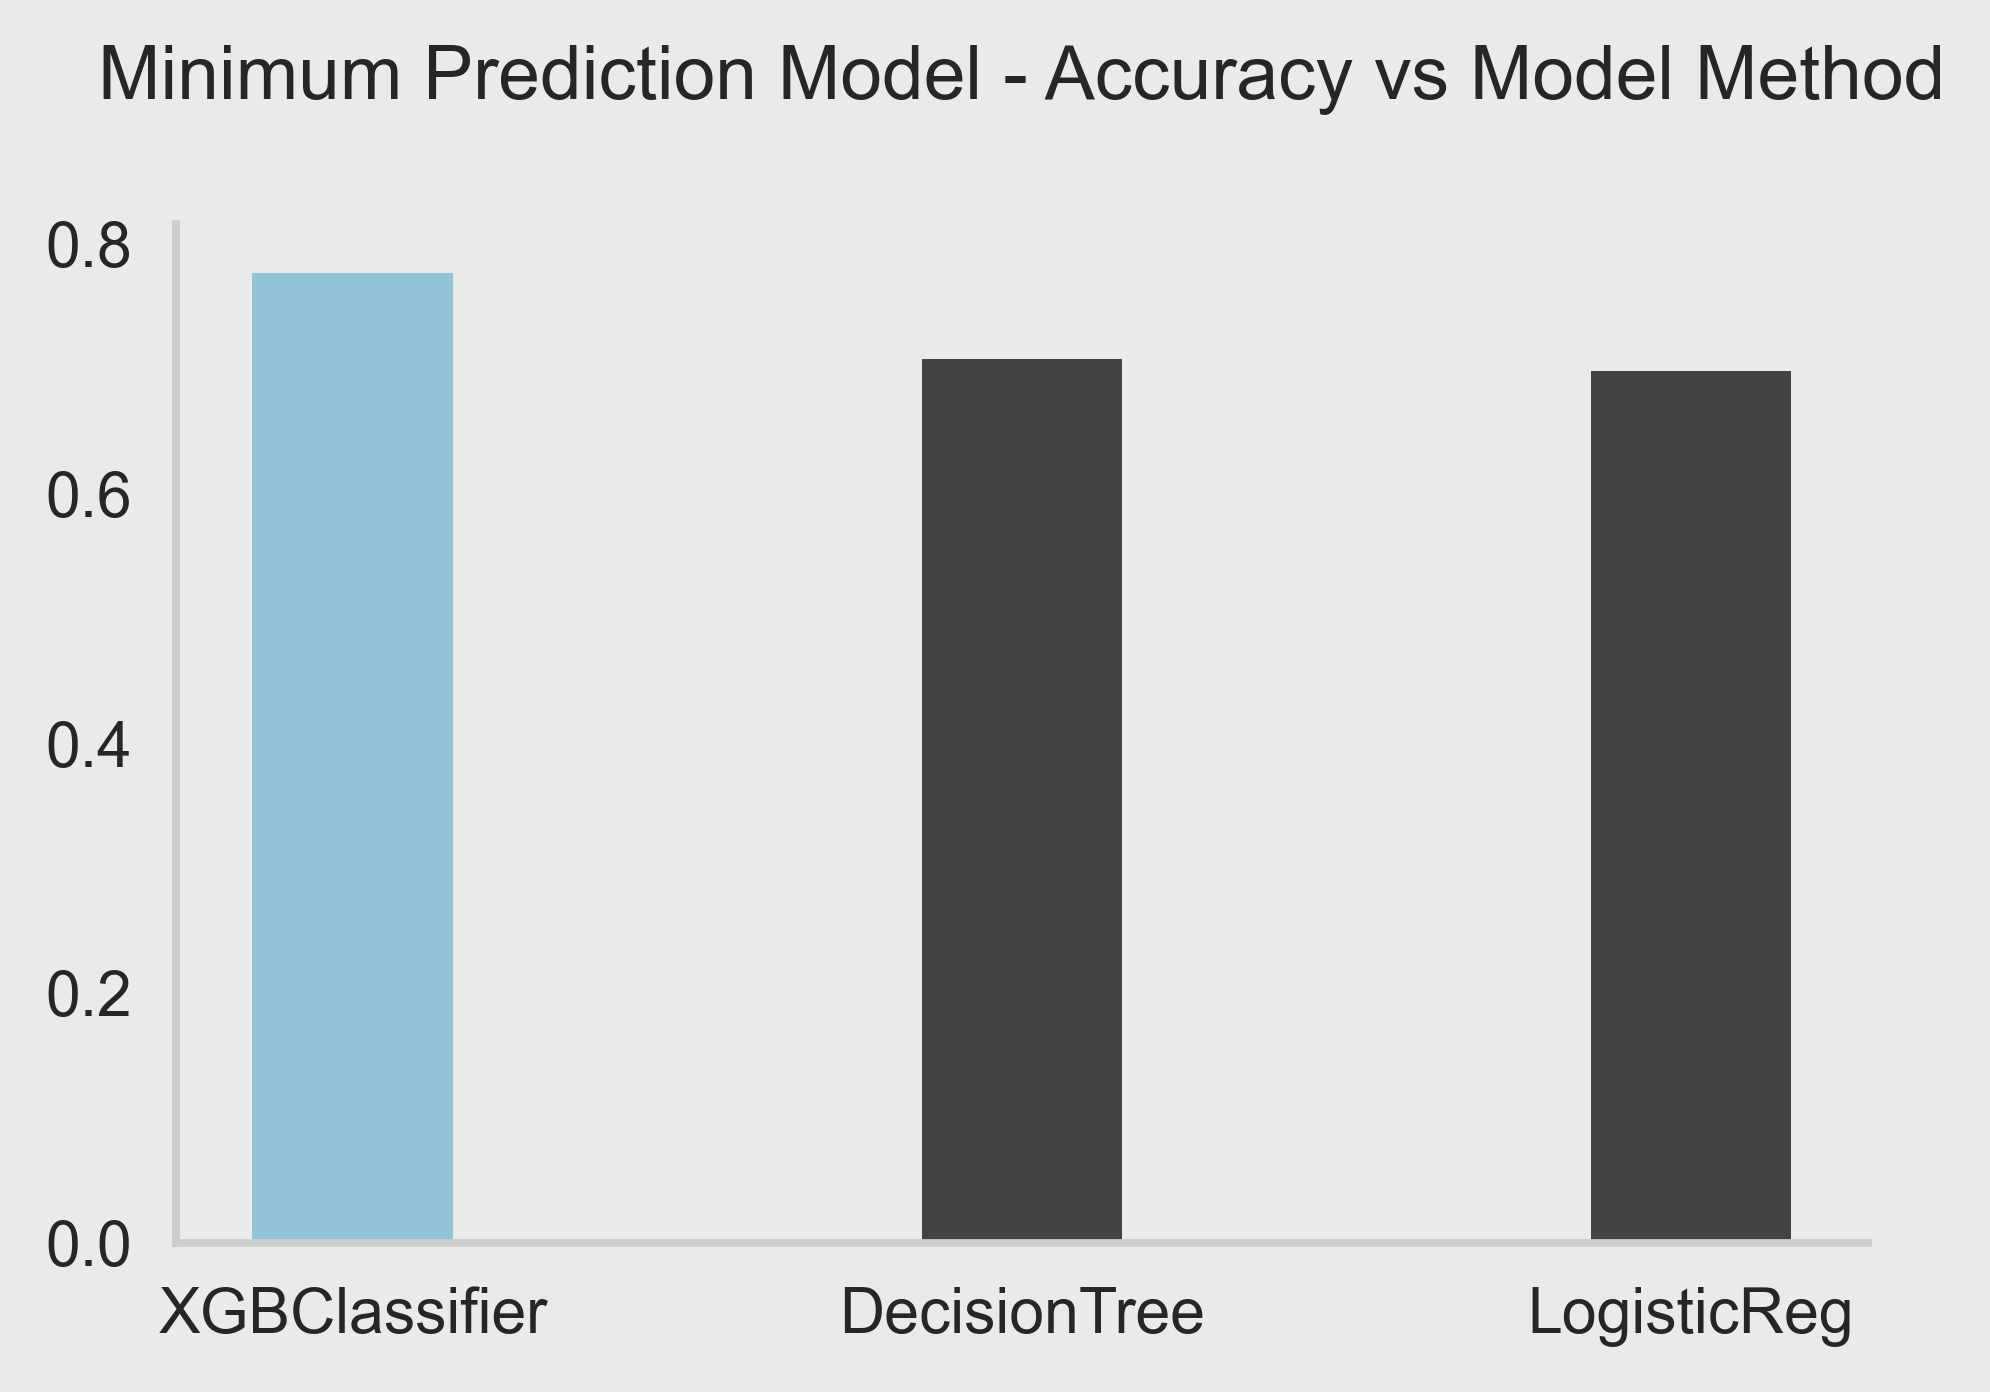

In [81]:
import matplotlib.pyplot as plt

GRAY = "#EAEAEA"
GREEN = "#44741a"
BLUE = "#91C4D9"
YELLOW = "#dfc474"
RED = "#ce344f"

rc = {'axes.facecolor':GRAY,
      'figure.facecolor':GRAY,
      'axes.grid' : False,
      'grid.color': '.9',
      'font.family':'Arial',
      'font.size' : 10,
      "figure.figsize": "4.854, 3",
      "figure.dpi": 450,
      "savefig.dpi": 450,
      "axes.spines.right": False,
      "axes.spines.left": True,
      "axes.spines.bottom": True,
      "axes.spines.top": False,
      "xtick.bottom": False,
      "ytick.left": False,
      "axes.titlepad": 20,
      # "savefig.directory": os.chdir(os.path.dirname("../../plots/eda"))
      }

plt.rcParams.update(rc)

plt.bar(classifier_name,mses, color = [BLUE, '#434343', '#434343'], width = 0.3)
plt.title("Minimum Prediction Model - Accuracy vs Model Method")
plt.show()

In [53]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', "PREDICTED_MIN_RATE"]
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB', "PREDICTED_OFFER_COUNT", "N_OFFER"]
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', xgboost.XGBClassifier())])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'PREDICTED_MIN_RATE']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [54]:
# predict_proba - first entry is for False probability second entry is True probability
pl.predict_proba(X_test)

array([[0.9687827 , 0.03121727],
       [0.99304014, 0.00695985],
       [0.02508903, 0.974911  ],
       ...,
       [0.4251985 , 0.5748015 ],
       [0.7193006 , 0.28069937],
       [0.9810557 , 0.0189443 ]], dtype=float32)

In [55]:
accuracy_score(pl.predict(X_test), y_test)

0.7765637048784392

In [56]:
feature_importances = pl.named_steps['regressor'].feature_importances_
len(feature_importances)

33

In [57]:
len(X.columns)

33

In [74]:
feature_importances = pl.named_steps['regressor'].feature_importances_
feature_name = ['RATE_USD', 'APPROX_ROUTE_MILE',
       'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT', 'DEADLINE_ON_WEEKDAY',
       'GIVEN_HOURS', 'REMAINING_HOURS', 'PREDICTED_MIN_RATE', 'FD_ENABLED',
       'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
       'STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH',
       'ORDER_DAY', 'ORDER_DAY_OF_WEEK', 'ORDER_WEEK', 'DEADLINE_MONTH',
       'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH',
       'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL',
       'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER',
       'ORGIN_DEST_COMB', 'PREDICTED_OFFER_COUNT', 'N_OFFER']

dict_feature = {}
for i in range(len(feature_name)):
    dict_feature[feature_name[i]] = feature_importances[i]


dict_feature = sorted(dict_feature.items(), key=lambda x:x[1], reverse= True)
dict_feature = dict_feature[0:20]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'PREDICTED_OFFER_COUNT'),
  Text(0, 1, 'N_OFFER'),
  Text(0, 2, 'PREDICTED_MIN_RATE'),
  Text(0, 3, 'RATE_USD'),
  Text(0, 4, 'OFFER_IS_FTL'),
  Text(0, 5, 'ESTIMATED_MODE_IS_FTL'),
  Text(0, 6, 'REMAINING_HOURS'),
  Text(0, 7, 'STRAIGHT_TRUCK_ALLOWED'),
  Text(0, 8, 'EXCLUSIVE_USE_REQUESTED'),
  Text(0, 9, 'PALLETIZED_LINEAR_FEET'),
  Text(0, 10, 'APPROX_ROUTE_MILE'),
  Text(0, 11, 'DESTINATION_CLUTER'),
  Text(0, 12, 'GIVEN_HOURS'),
  Text(0, 13, 'DEADLINE_WEEK'),
  Text(0, 14, 'OFFER_WEEK'),
  Text(0, 15, 'ORDER_MONTH'),
  Text(0, 16, 'DEADLINE_MONTH'),
  Text(0, 17, 'REEFER_ALLOWED'),
  Text(0, 18, 'LOAD_BAR_COUNT'),
  Text(0, 19, 'LOAD_TO_RIDE_REQUESTED')])

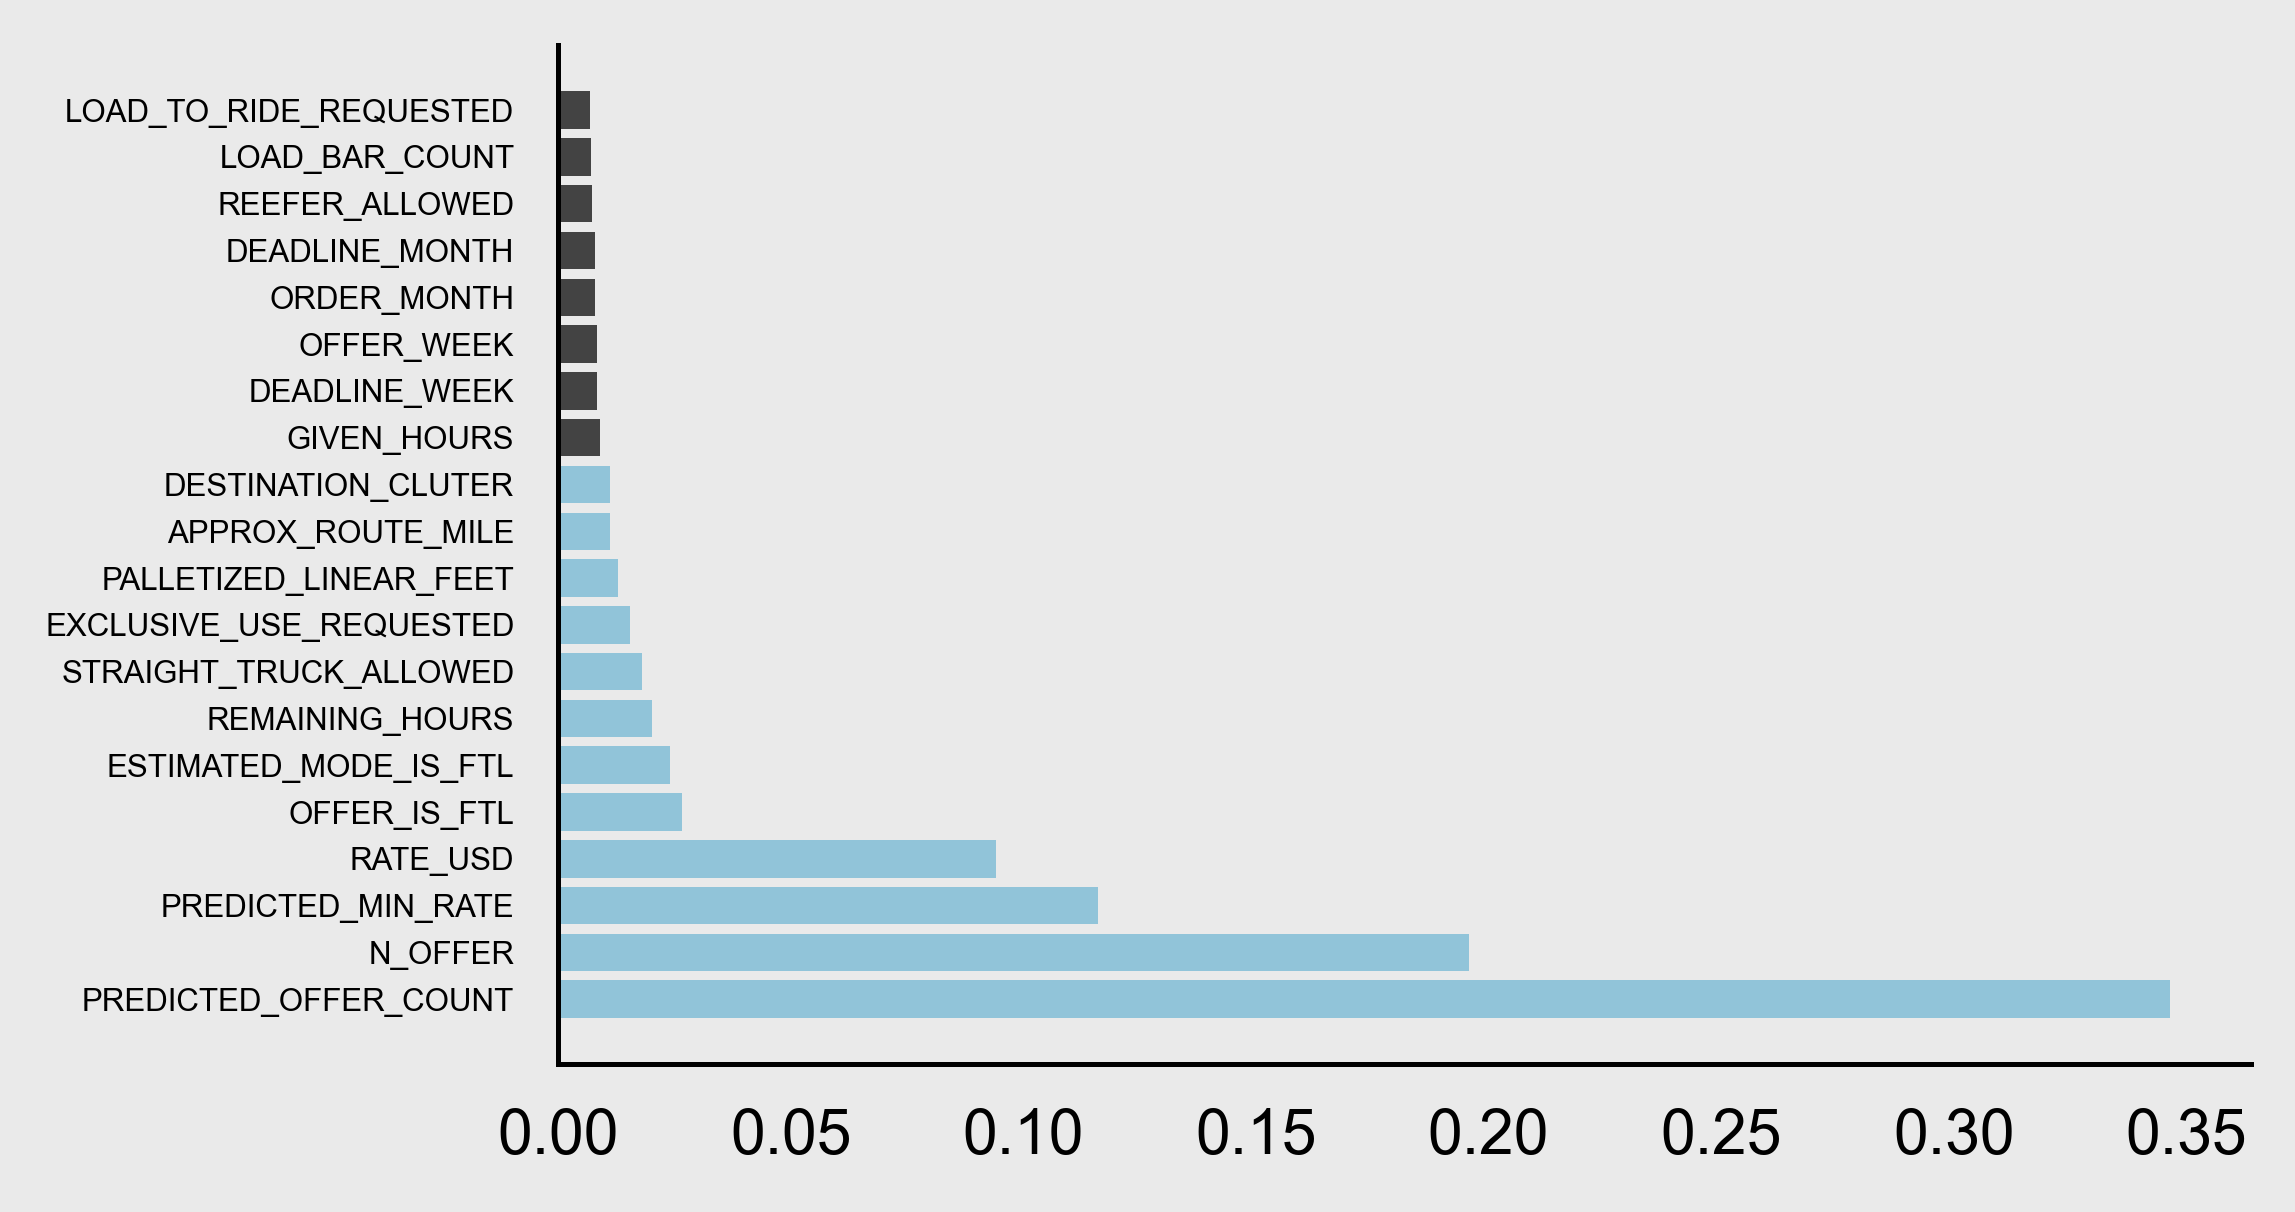

In [75]:
feature_name = []
feature_importances = []
for key,value in dict_feature:
    feature_name.append(key)
    feature_importances.append(value)

col = []
for coef in feature_importances:
    if coef > 0.01:
      col.append(BLUE)
    else:
      col.append("#434343")

plt.barh(feature_name,feature_importances, align='center', color = col)
plt.yticks(fontsize = 5)

In [64]:
dict_feature

[('PREDICTED_OFFER_COUNT', 0.34657076),
 ('N_OFFER', 0.19585066),
 ('PREDICTED_MIN_RATE', 0.11604084),
 ('RATE_USD', 0.09415512),
 ('OFFER_IS_FTL', 0.026608381),
 ('ESTIMATED_MODE_IS_FTL', 0.024114586),
 ('REMAINING_HOURS', 0.020116428),
 ('STRAIGHT_TRUCK_ALLOWED', 0.018022219),
 ('EXCLUSIVE_USE_REQUESTED', 0.015540639),
 ('PALLETIZED_LINEAR_FEET', 0.012836234),
 ('APPROXIMATE_DRIVING_ROUTE_MILEAGE', 0.011199605),
 ('DESTINATION_CLUTER', 0.011159267),
 ('GIVEN_HOURS', 0.009016148),
 ('DEADLINE_WEEK', 0.008388365),
 ('OFFER_WEEK', 0.008263297),
 ('ORDER_MONTH', 0.007965268),
 ('DEADLINE_MONTH', 0.007900855),
 ('REEFER_ALLOWED', 0.007286001),
 ('LOAD_BAR_COUNT', 0.0069647157),
 ('LOAD_TO_RIDE_REQUESTED', 0.006925621),
 ('ORDER_WEEK', 0.0066853077),
 ('OFFER_MONTH', 0.0058468087),
 ('ORGIN_DEST_COMB', 0.0056568985),
 ('ORIGIN_CLUSTER', 0.0052022603),
 ('ORDER_DAY', 0.004893307)]

<BarContainer object of 33 artists>

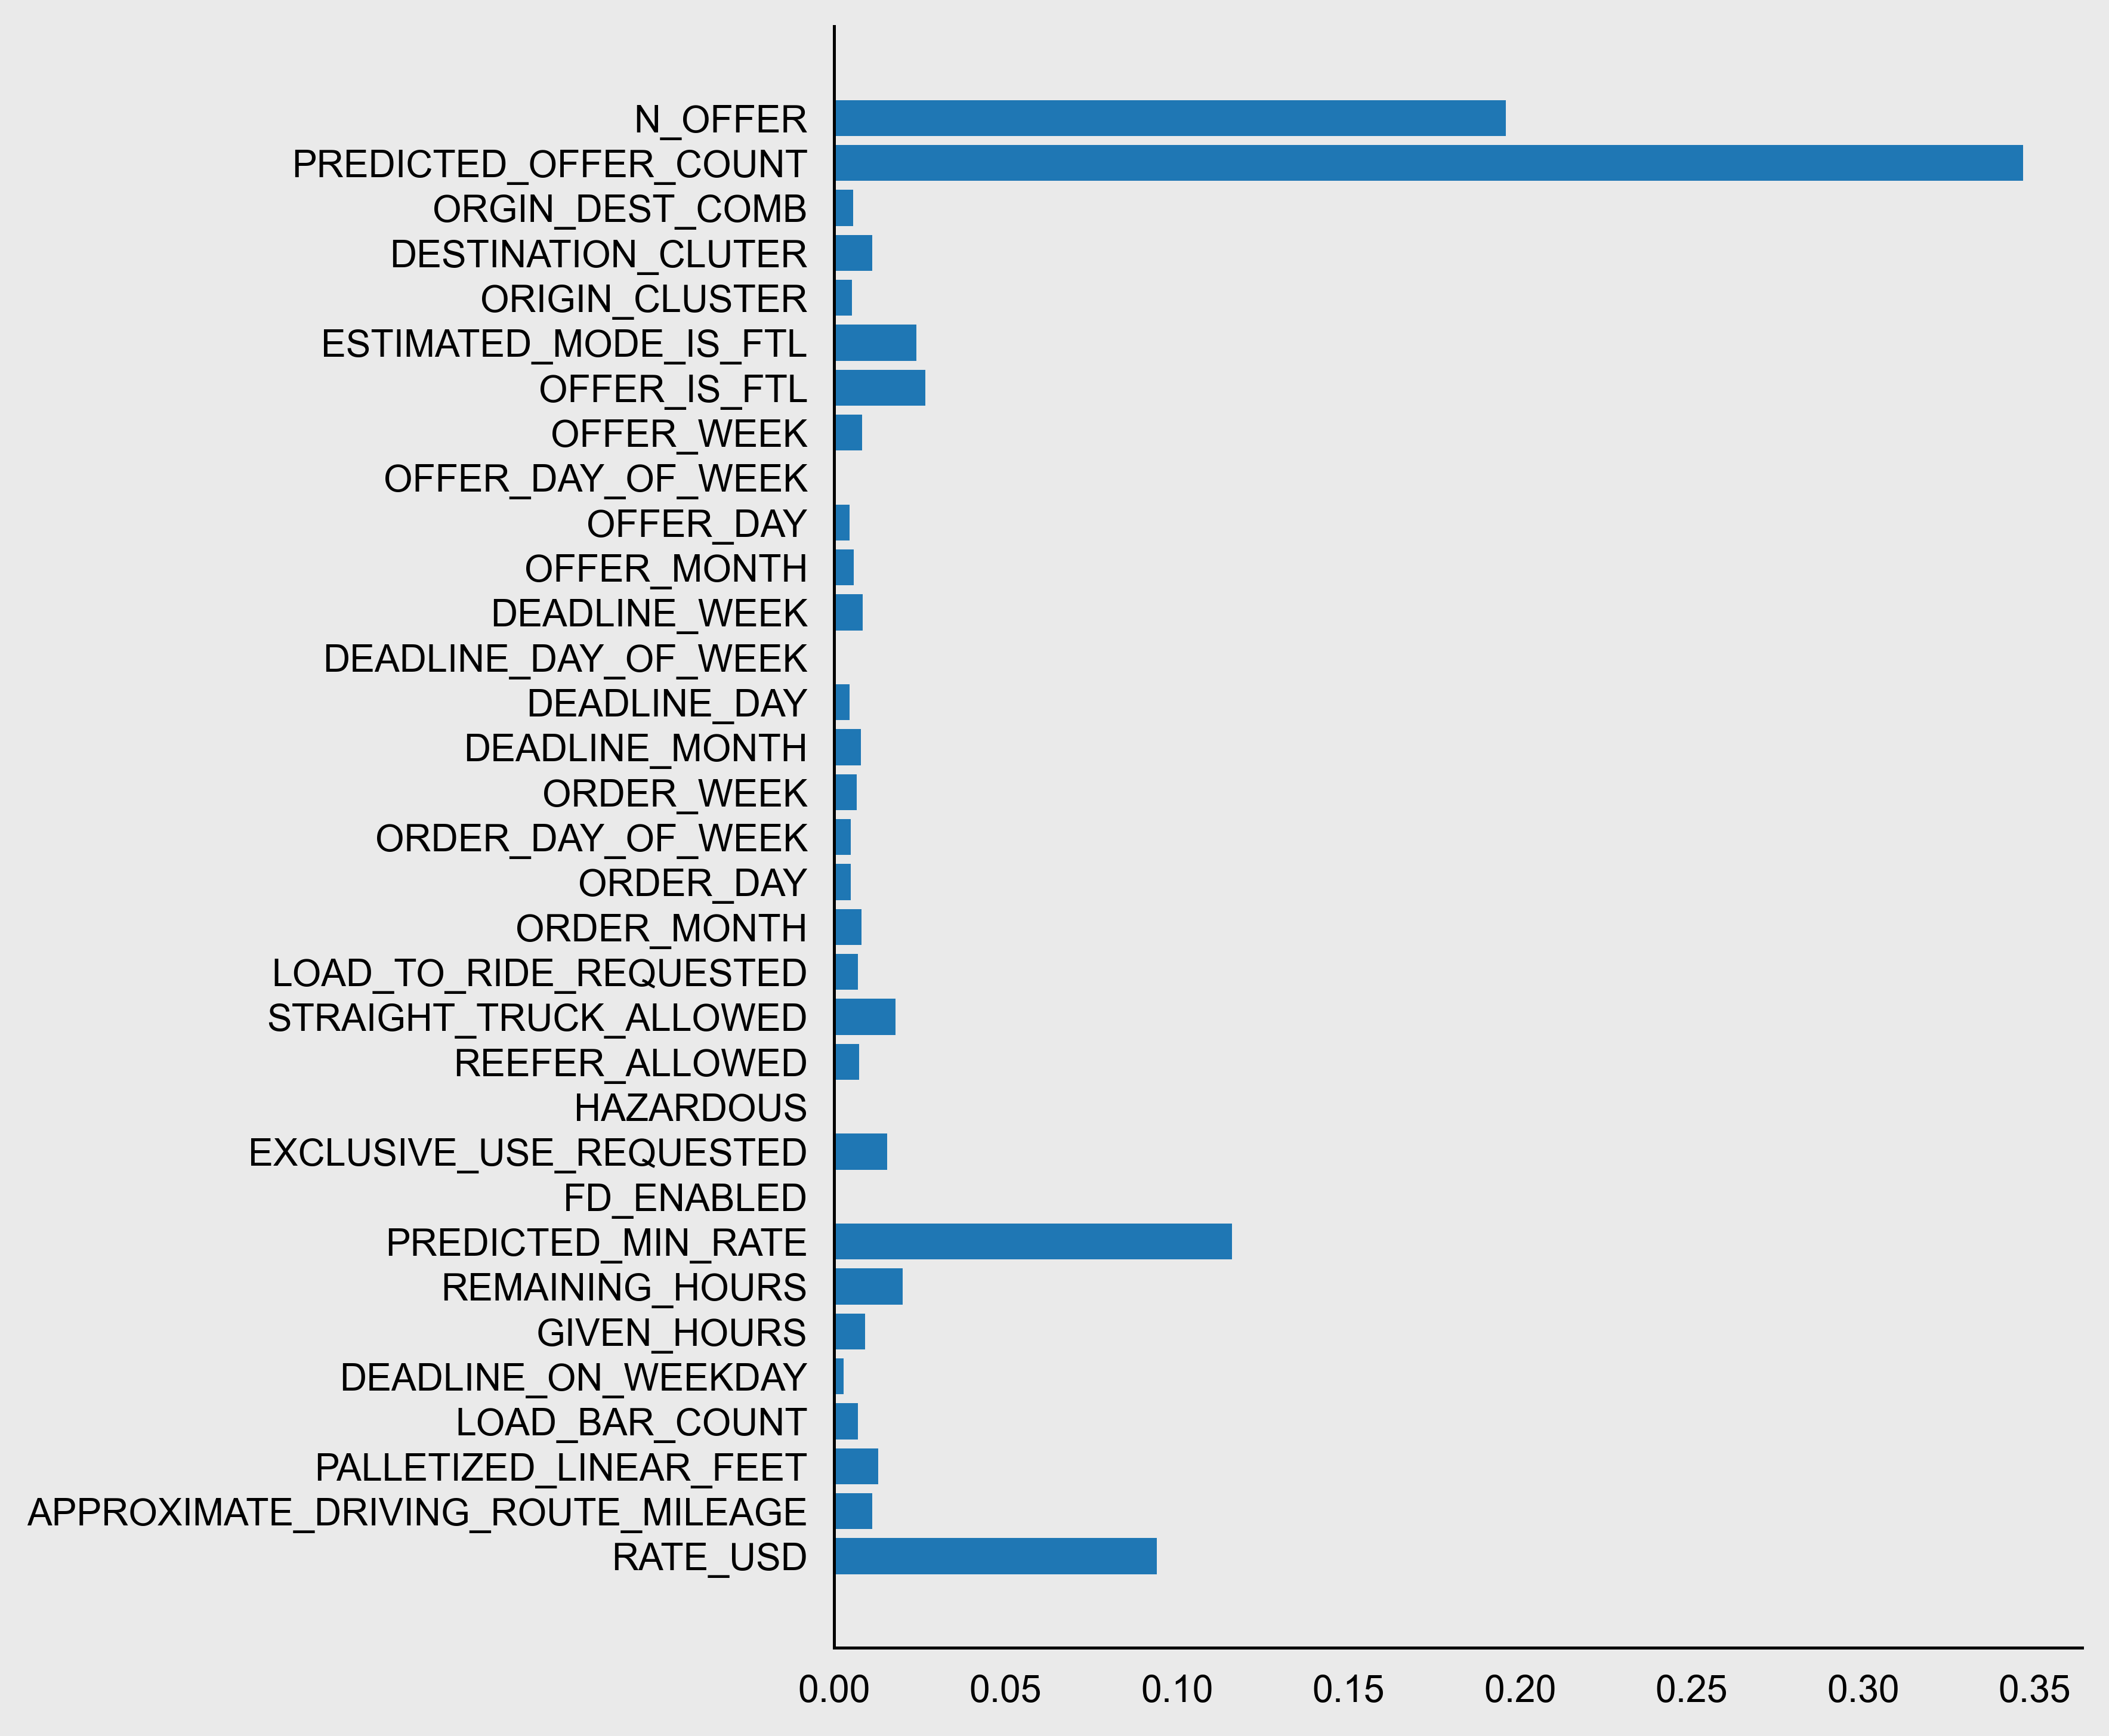

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
feature_names = X.columns
plt.barh(feature_names,feature_importances, align='center',)

In [54]:
# predict_proba - first entry is for False probability second entry is True probability
pl.predict_proba(X_test)

array([[0.91668206, 0.08331794],
       [0.8528117 , 0.14718832],
       [0.06133991, 0.9386601 ],
       ...,
       [0.5436922 , 0.45630783],
       [0.31336713, 0.6866329 ],
       [0.9532351 , 0.04676494]], dtype=float32)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(pl.predict(X_test), y_test)

0.7521205860528728

In [56]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET',
            'GIVEN_HOURS','REMAINING_HOURS', "PREDICTED_MIN_RATE"]
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['EXCLUSIVE_USE_REQUESTED', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'ORDER_MONTH','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'DESTINATION_CLUTER', "PREDICTED_OFFER_COUNT", "N_OFFER"]
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', xgboost.XGBClassifier())])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'PREDICTED_MIN_RATE']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['EXCLUSIVE_USE_REQUESTED',
                                                   'REEFER_AL...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [57]:
pl.predict_proba(X_test)

array([[0.92518866, 0.07481132],
       [0.86578214, 0.13421784],
       [0.0453788 , 0.9546212 ],
       ...,
       [0.58001405, 0.41998595],
       [0.3299026 , 0.6700974 ],
       [0.933807  , 0.06619295]], dtype=float32)

In [58]:
pl.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

In [59]:
accuracy_score(pl.predict(X_test), y_test)

0.7525231215414684

In [60]:
model = xgboost.XGBClassifier()
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>

In [52]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET',
            'GIVEN_HOURS','REMAINING_HOURS', "PREDICTED_MIN_RATE"]
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'EXCLUSIVE_USE_REQUESTED', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'ORDER_MONTH','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'DESTINATION_CLUTER', "PREDICTED_OFFER_COUNT"]
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

param_grid = {
    'xgb__max_depth': [2, 3, 5, 7, 10],
    'xgb__n_estimators': [10, 100, 500],
    "xgb__reg_alpha": [0, 0.5, 1, 5],
    "xgb__reg_lambda": [0, 0.5, 1, 5]
}

pipeline = Pipeline(steps=[
    ('preprocessor', preproc), 
    ("xgb", xgboost.XGBClassifier())
])

grid = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 3,
    verbose = 3,
)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MaxAbsScaler())]),
                                                                         ['RATE_USD',
                                                                          'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                                          'PALLETIZED_LINEAR_FEET',
                                                                          'ESTIMATED_COST_AT_ORDER',
                                                                          'GIVEN_HOURS',
                                                                          'REMAINING_HOURS']),
                                                                        ('categorization',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OrdinalEncoder())]),
                                                                         ['IS...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__max_depth': [2, 3, 5, 7, 10],
                         'xgb__n_estimators': [10, 100, 500],
                         'xgb__reg_alpha': [0, 0.5, 1, 5],
                         'xgb__reg_lambda': [0, 0.5, 1, 5]},
             scoring='accuracy', verbose=3)

In [53]:
grid.best_params_

{'xgb__max_depth': 10,
 'xgb__n_estimators': 500,
 'xgb__reg_alpha': 1,
 'xgb__reg_lambda': 1}

In [ ]:
accuracy_score(pl.predict(X_test), y_test)

In [33]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET',
            'GIVEN_HOURS','REMAINING_HOURS', "PREDICTED_MIN_RATE"]
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['EXCLUSIVE_USE_REQUESTED', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'ORDER_MONTH','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'DESTINATION_CLUTER', "PREDICTED_OFFER_COUNT"]
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

In [34]:
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', xgboost.XGBClassifier(max_depth = 10,n_estimators = 500,reg_alpha = 1,reg_lambda = 1))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'PREDICTED_MIN_RATE']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['EXCLUSIVE_USE_REQUESTED',
                                                   'REEFER_AL...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=10, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [35]:
accuracy_score(pl.predict(X_test), y_test)

0.7856134786340953

In [36]:
merge_order['PREDICTED_IS_MIN'] = pl.predict(merge_order)
merge_order

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,ORIGIN_CLUSTER,DESTINATION_CLUTER,ORGIN_DEST_COMB,PREDICTED_OFFER_COUNT,N_OFFER,MIN_RATE,PREDICTED_MIN_RATE,IS_MINIMUM,PREDICTED_IS_MIN
0,1,1,2019-11-13 05:30:16,1290.000,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,2,5,25,6,0,1290.00,1225.422607,True,1
1,2,2,2019-12-06 08:43:01,2709.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,0,2064.00,2062.425049,False,0
2,3,2,2019-12-06 08:45:31,3225.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,1,2064.00,2047.701782,False,0
3,4,2,2019-12-06 08:48:09,2580.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,4,2,2064.00,2039.584229,False,0
4,5,2,2019-12-06 08:49:46,3870.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,2,5,25,6,3,2064.00,2548.400879,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687305,1688,186212,2021-06-24 05:56:38,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,6,4,64,5,1,7256.25,7246.656738,False,0
687306,1688,186212,2021-06-24 06:00:00,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,2,7256.25,7246.656738,False,0
687307,570,186212,2021-06-24 06:06:34,7659.375,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,3,7256.25,7224.562988,False,0
687308,570,186212,2021-06-24 06:06:53,7256.250,1,1,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0,1,4,14,5,4,7256.25,7164.128906,True,1


In [37]:
X = merge_order[['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', "PREDICTED_MIN_RATE", 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK', 'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 
            'ESTIMATED_MODE_IS_FTL', 'ORIGIN_CLUSTER', 'DESTINATION_CLUTER','ORGIN_DEST_COMB', "PREDICTED_OFFER_COUNT", "N_OFFER"]]
y = merge_order[['IS_MINIMUM']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

### Graphs

In [38]:
graph_df = merge_order[["CARRIER_ID", "REFERENCE_NUMBER", "LOAD_DELIVERED_FROM_OFFER","CREATED_ON_HQ", "RATE_USD", "ESTIMATED_COST_AT_ORDER", "OFFER_COUNT","PREDICTED_OFFER_COUNT", "N_OFFER", "MIN_RATE", "PREDICTED_MIN_RATE", "IS_MINIMUM", "PREDICTED_IS_MIN"]]
graph_df

,CARRIER_ID,REFERENCE_NUMBER,LOAD_DELIVERED_FROM_OFFER,CREATED_ON_HQ,RATE_USD,ESTIMATED_COST_AT_ORDER,OFFER_COUNT,PREDICTED_OFFER_COUNT,N_OFFER,MIN_RATE,PREDICTED_MIN_RATE,IS_MINIMUM,PREDICTED_IS_MIN
0,1,1,0,2019-11-13 05:30:16,1290.000,1163.8767,1,6,0,1290.00,1225.422607,True,1
1,2,2,0,2019-12-06 08:43:01,2709.000,1865.2626,6,6,0,2064.00,2062.425049,False,0
2,3,2,0,2019-12-06 08:45:31,3225.000,1865.2626,6,6,1,2064.00,2047.701782,False,0
3,4,2,0,2019-12-06 08:48:09,2580.000,1865.2626,6,4,2,2064.00,2039.584229,False,0
4,5,2,0,2019-12-06 08:49:46,3870.000,1865.2626,6,6,3,2064.00,2548.400879,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687305,1688,186212,0,2021-06-24 05:56:38,7417.500,9421.3344,5,5,1,7256.25,7246.656738,False,0
687306,1688,186212,0,2021-06-24 06:00:00,7417.500,9421.3344,5,5,2,7256.25,7246.656738,False,0
687307,570,186212,0,2021-06-24 06:06:34,7659.375,9421.3344,5,5,3,7256.25,7224.562988,False,0
687308,570,186212,1,2021-06-24 06:06:53,7256.250,9421.3344,5,5,4,7256.25,7164.128906,True,1


In [39]:
graph_df.head(10)

,CARRIER_ID,REFERENCE_NUMBER,LOAD_DELIVERED_FROM_OFFER,CREATED_ON_HQ,RATE_USD,ESTIMATED_COST_AT_ORDER,OFFER_COUNT,PREDICTED_OFFER_COUNT,N_OFFER,MIN_RATE,PREDICTED_MIN_RATE,IS_MINIMUM,PREDICTED_IS_MIN
0,1,1,0,2019-11-13 05:30:16,1290.0,1163.8767,1,6,0,1290.0,1225.422607,True,1
1,2,2,0,2019-12-06 08:43:01,2709.0,1865.2626,6,6,0,2064.0,2062.425049,False,0
2,3,2,0,2019-12-06 08:45:31,3225.0,1865.2626,6,6,1,2064.0,2047.701782,False,0
3,4,2,0,2019-12-06 08:48:09,2580.0,1865.2626,6,4,2,2064.0,2039.584229,False,0
4,5,2,0,2019-12-06 08:49:46,3870.0,1865.2626,6,6,3,2064.0,2548.400879,False,0
5,6,2,0,2019-12-06 08:54:33,2838.0,1865.2626,6,6,4,2064.0,2024.517944,False,0
6,7,2,0,2019-12-06 09:12:30,2064.0,1865.2626,6,4,5,2064.0,1812.154175,True,0
7,8,3,1,2020-03-18 12:38:50,1161.0,1209.3750,2,2,0,1161.0,1125.612793,True,1
8,9,3,0,2020-03-18 13:37:51,1483.5,1209.3750,2,2,1,1161.0,1389.942139,False,0
9,10,4,1,2021-04-27 09:08:07,2580.0,2648.1378,1,1,0,2580.0,2529.888428,True,1


In [40]:
((graph_df['ESTIMATED_COST_AT_ORDER'] - graph_df['MIN_RATE']) ** 2).mean()

523924.30125170486

In [41]:
((graph_df['ESTIMATED_COST_AT_ORDER'] - graph_df['PREDICTED_MIN_RATE']) ** 2).mean()

519132.9265701642

In [42]:
X = graph_df[graph_df.columns]
y = graph_df[graph_df.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

In [43]:
X_test.sort_index()

,CARRIER_ID,REFERENCE_NUMBER,LOAD_DELIVERED_FROM_OFFER,CREATED_ON_HQ,RATE_USD,ESTIMATED_COST_AT_ORDER,OFFER_COUNT,PREDICTED_OFFER_COUNT,N_OFFER,MIN_RATE,PREDICTED_MIN_RATE,IS_MINIMUM,PREDICTED_IS_MIN
4,5,2,0,2019-12-06 08:49:46,3870.000,1865.2626,6,6,3,2064.00,2548.400879,False,0
5,6,2,0,2019-12-06 08:54:33,2838.000,1865.2626,6,6,4,2064.00,2024.517944,False,0
6,7,2,0,2019-12-06 09:12:30,2064.000,1865.2626,6,4,5,2064.00,1812.154175,True,0
8,9,3,0,2020-03-18 13:37:51,1483.500,1209.3750,2,2,1,1161.00,1389.942139,False,0
13,13,6,0,2020-12-04 08:09:28,2967.000,1545.6264,5,5,2,1935.00,1981.493286,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687299,4342,186211,0,2022-05-17 13:34:32,1257.750,1161.0000,9,9,4,1173.90,1168.560791,False,1
687300,13330,186211,0,2022-05-18 05:57:19,1741.500,1161.0000,9,9,5,1173.90,1469.653931,False,0
687303,13330,186211,0,2022-05-18 06:20:13,1548.000,1161.0000,9,9,8,1173.90,1323.319580,False,0
687304,12423,186212,0,2021-06-23 13:36:53,7659.375,9421.3344,5,4,0,7256.25,7629.177734,False,1


In [44]:
flock_freight_mse_btw_min_rate = ((X_test['ESTIMATED_COST_AT_ORDER'] - X_test['MIN_RATE']) ** 2).mean()

In [45]:
ours_mse_btw_min_rate = ((X_test['ESTIMATED_COST_AT_ORDER'] - X_test['PREDICTED_MIN_RATE']) ** 2).mean()

In [46]:
MSE = {"Flock Freight's Estimated Cost" : [flock_freight_mse_btw_min_rate], "Our Model's Predicted Cost" : [ours_mse_btw_min_rate]}

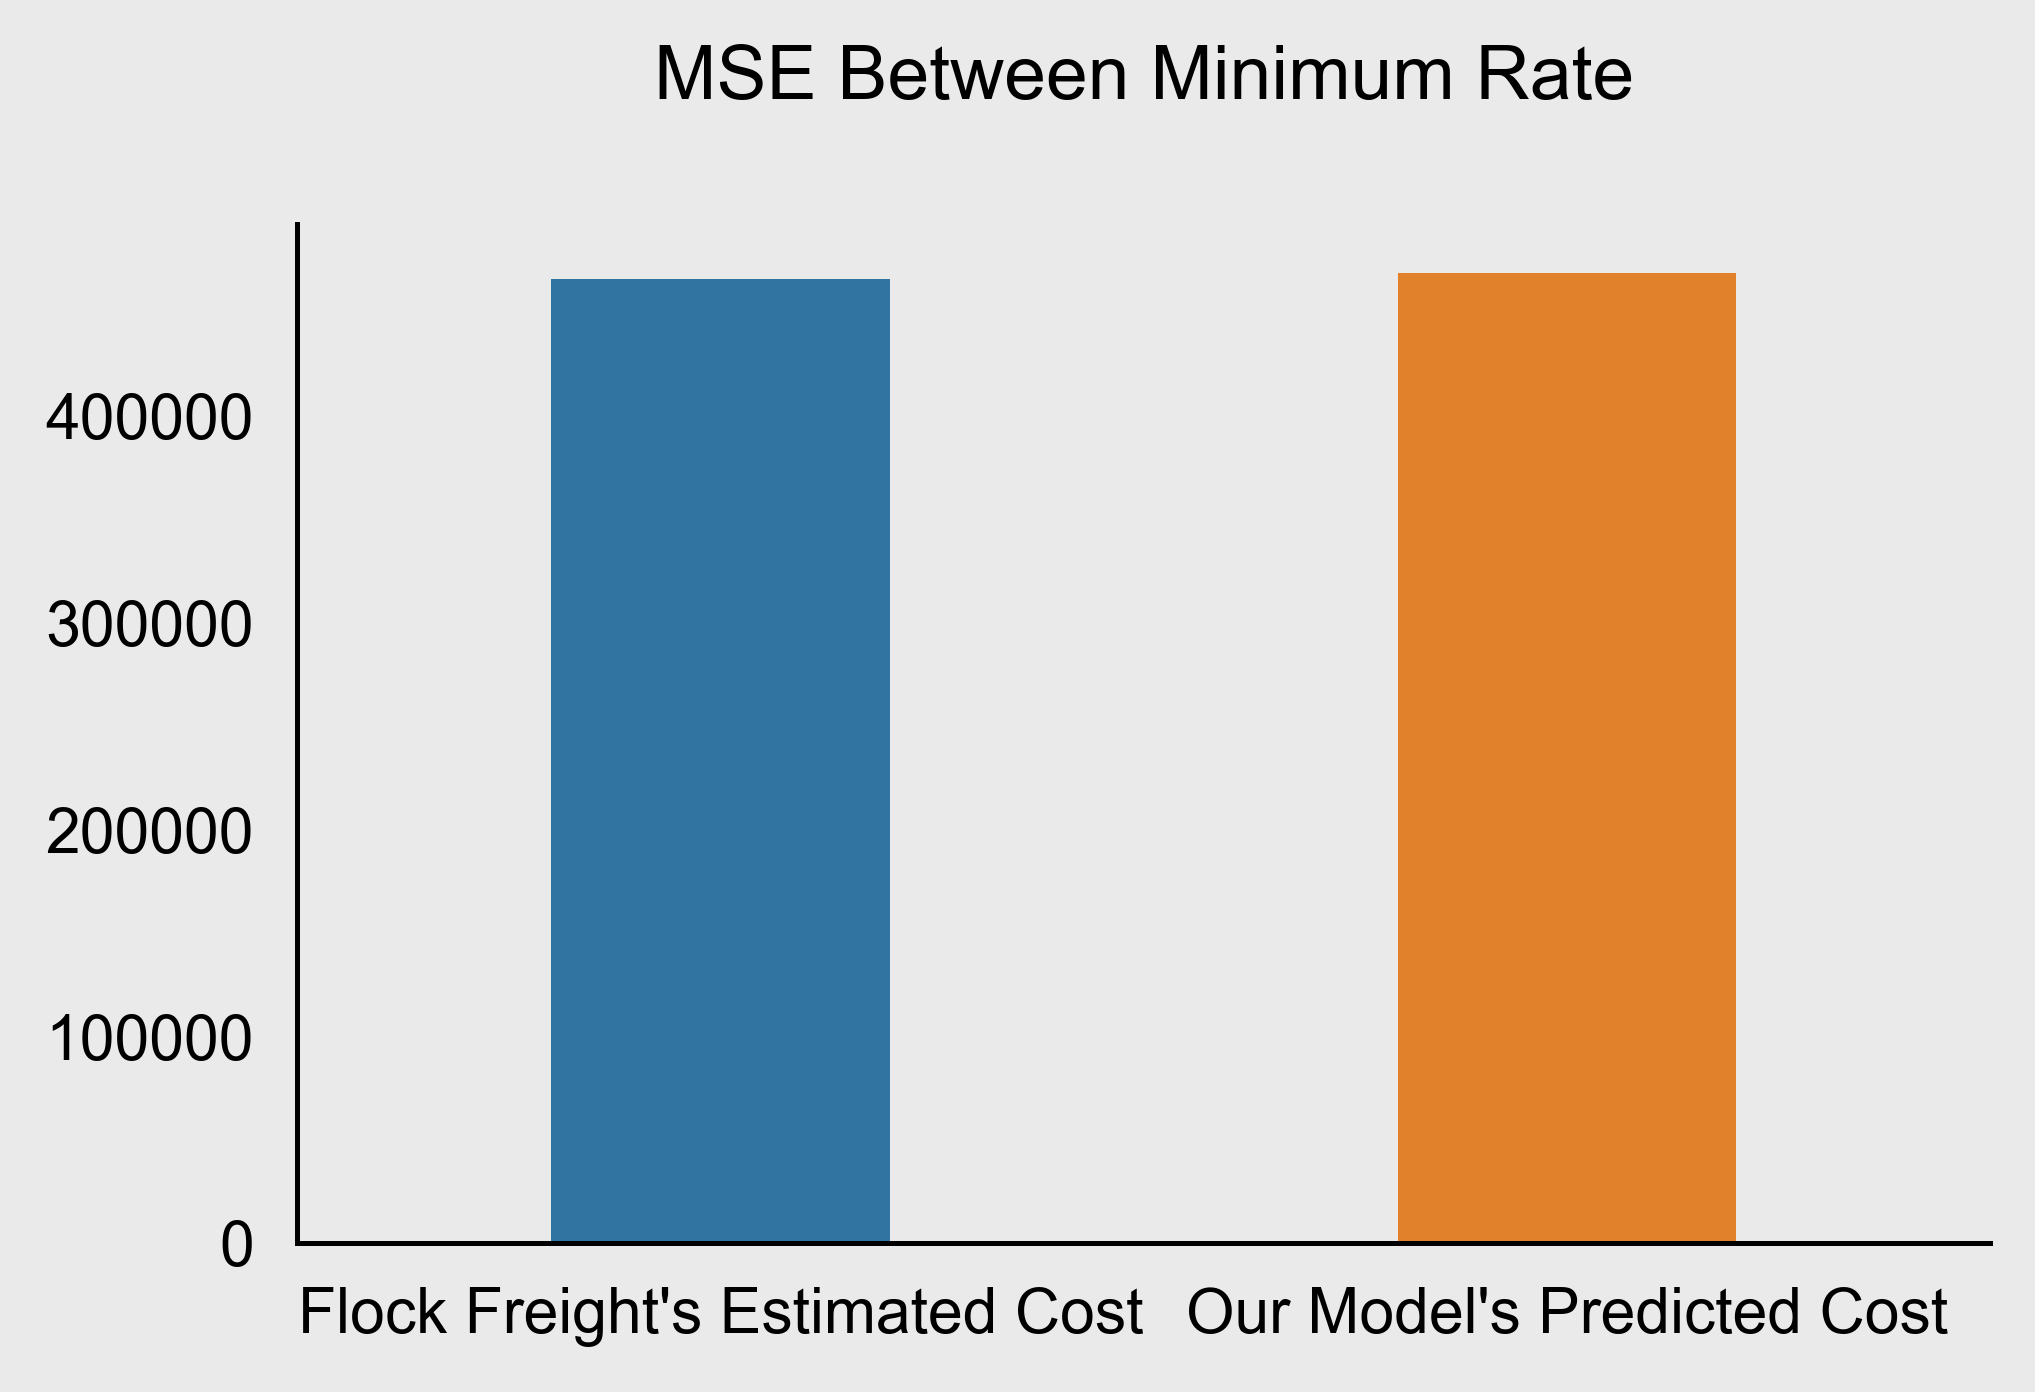

In [47]:
GRAY = "#EAEAEA"
GREEN = "#44741a"
BLUE = "#91C4D9"
YELLOW = "#dfc474"
RED = "#ce344f"

rc = {'axes.facecolor':GRAY,
      'figure.facecolor':GRAY,
      'axes.grid' : False,
      'grid.color': '.9',
      'font.family':'Arial',
      'font.size' : 10,
      "figure.figsize": "4.854, 3",
      "figure.dpi": 450,
      "savefig.dpi": 450,
      "axes.spines.right": False,
      "axes.spines.left": True,
      "axes.spines.bottom": True,
      "axes.spines.top": False,
      "xtick.bottom": False,
      "ytick.left": False,
      "axes.titlepad": 20,
      # "savefig.directory": os.chdir(os.path.dirname("../../plots/eda"))
      }

plt.rcParams.update(rc)

sns.barplot(data = pd.DataFrame(MSE), width = 0.4).set(title='MSE Between Minimum Rate')

plt.show()

plt.rcParams.update(rc)

In [48]:
is_min_true = X_test[X_test['IS_MINIMUM'] == True]
is_min_true

,CARRIER_ID,REFERENCE_NUMBER,LOAD_DELIVERED_FROM_OFFER,CREATED_ON_HQ,RATE_USD,ESTIMATED_COST_AT_ORDER,OFFER_COUNT,PREDICTED_OFFER_COUNT,N_OFFER,MIN_RATE,PREDICTED_MIN_RATE,IS_MINIMUM,PREDICTED_IS_MIN
243690,1232,66169,0,2020-12-01 15:16:09,1677.000000,2361.6030,1,3,0,1677.000000,1558.293335,True,1
154303,25751,42356,0,2022-10-05 09:34:21,516.000000,719.2137,11,11,8,516.000000,520.431091,True,1
221097,2015,60122,0,2022-06-02 06:35:28,2064.000000,2038.8192,7,7,3,2064.000000,1898.363892,True,0
346736,11299,93871,1,2022-09-12 12:05:02,903.000000,907.3989,5,5,4,903.000000,838.003723,True,1
42271,11229,11932,1,2021-05-27 13:21:30,982.676471,2006.1951,3,4,1,982.676471,1076.090576,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213813,248,58133,1,2020-12-14 10:46:42,1161.000000,1492.0785,1,6,0,1161.000000,1097.186401,True,1
264361,5790,71698,0,2022-08-31 06:24:11,154.800000,370.8105,1,13,0,154.800000,108.406563,True,0
308586,1572,83421,0,2021-07-12 12:47:23,3870.000000,4981.5801,3,3,0,3870.000000,3802.321045,True,1
682342,7020,184816,0,2021-12-15 08:37:18,5805.000000,9240.6957,5,2,0,5805.000000,5717.920898,True,1


In [49]:
Flock_count = is_min_true[is_min_true['LOAD_DELIVERED_FROM_OFFER'] == 1].shape[0]
Our_model_count = is_min_true[is_min_true['PREDICTED_IS_MIN'] == 1].shape[0]

In [1]:
36398 / 65179

0.5584313966154744

In [50]:
Flock_count

33636

In [51]:
Our_model_count

36398

In [52]:
Count = {"Flock Freight's Accuracy" : [Flock_count], "Our Model's Accuracy" : [Our_model_count]}
Count["Flock Freight's Accuracy"] = [33636 / 65057]
Count["Our Model's Accuracy"] = [36398 / 65057]

In [53]:
Count

{"Flock Freight's Accuracy": [0.5170235332093395],
 "Our Model's Accuracy": [0.5594786110641438]}

[Text(0.5, 1.0, 'Accuracy of Selecting Minimum Order')]

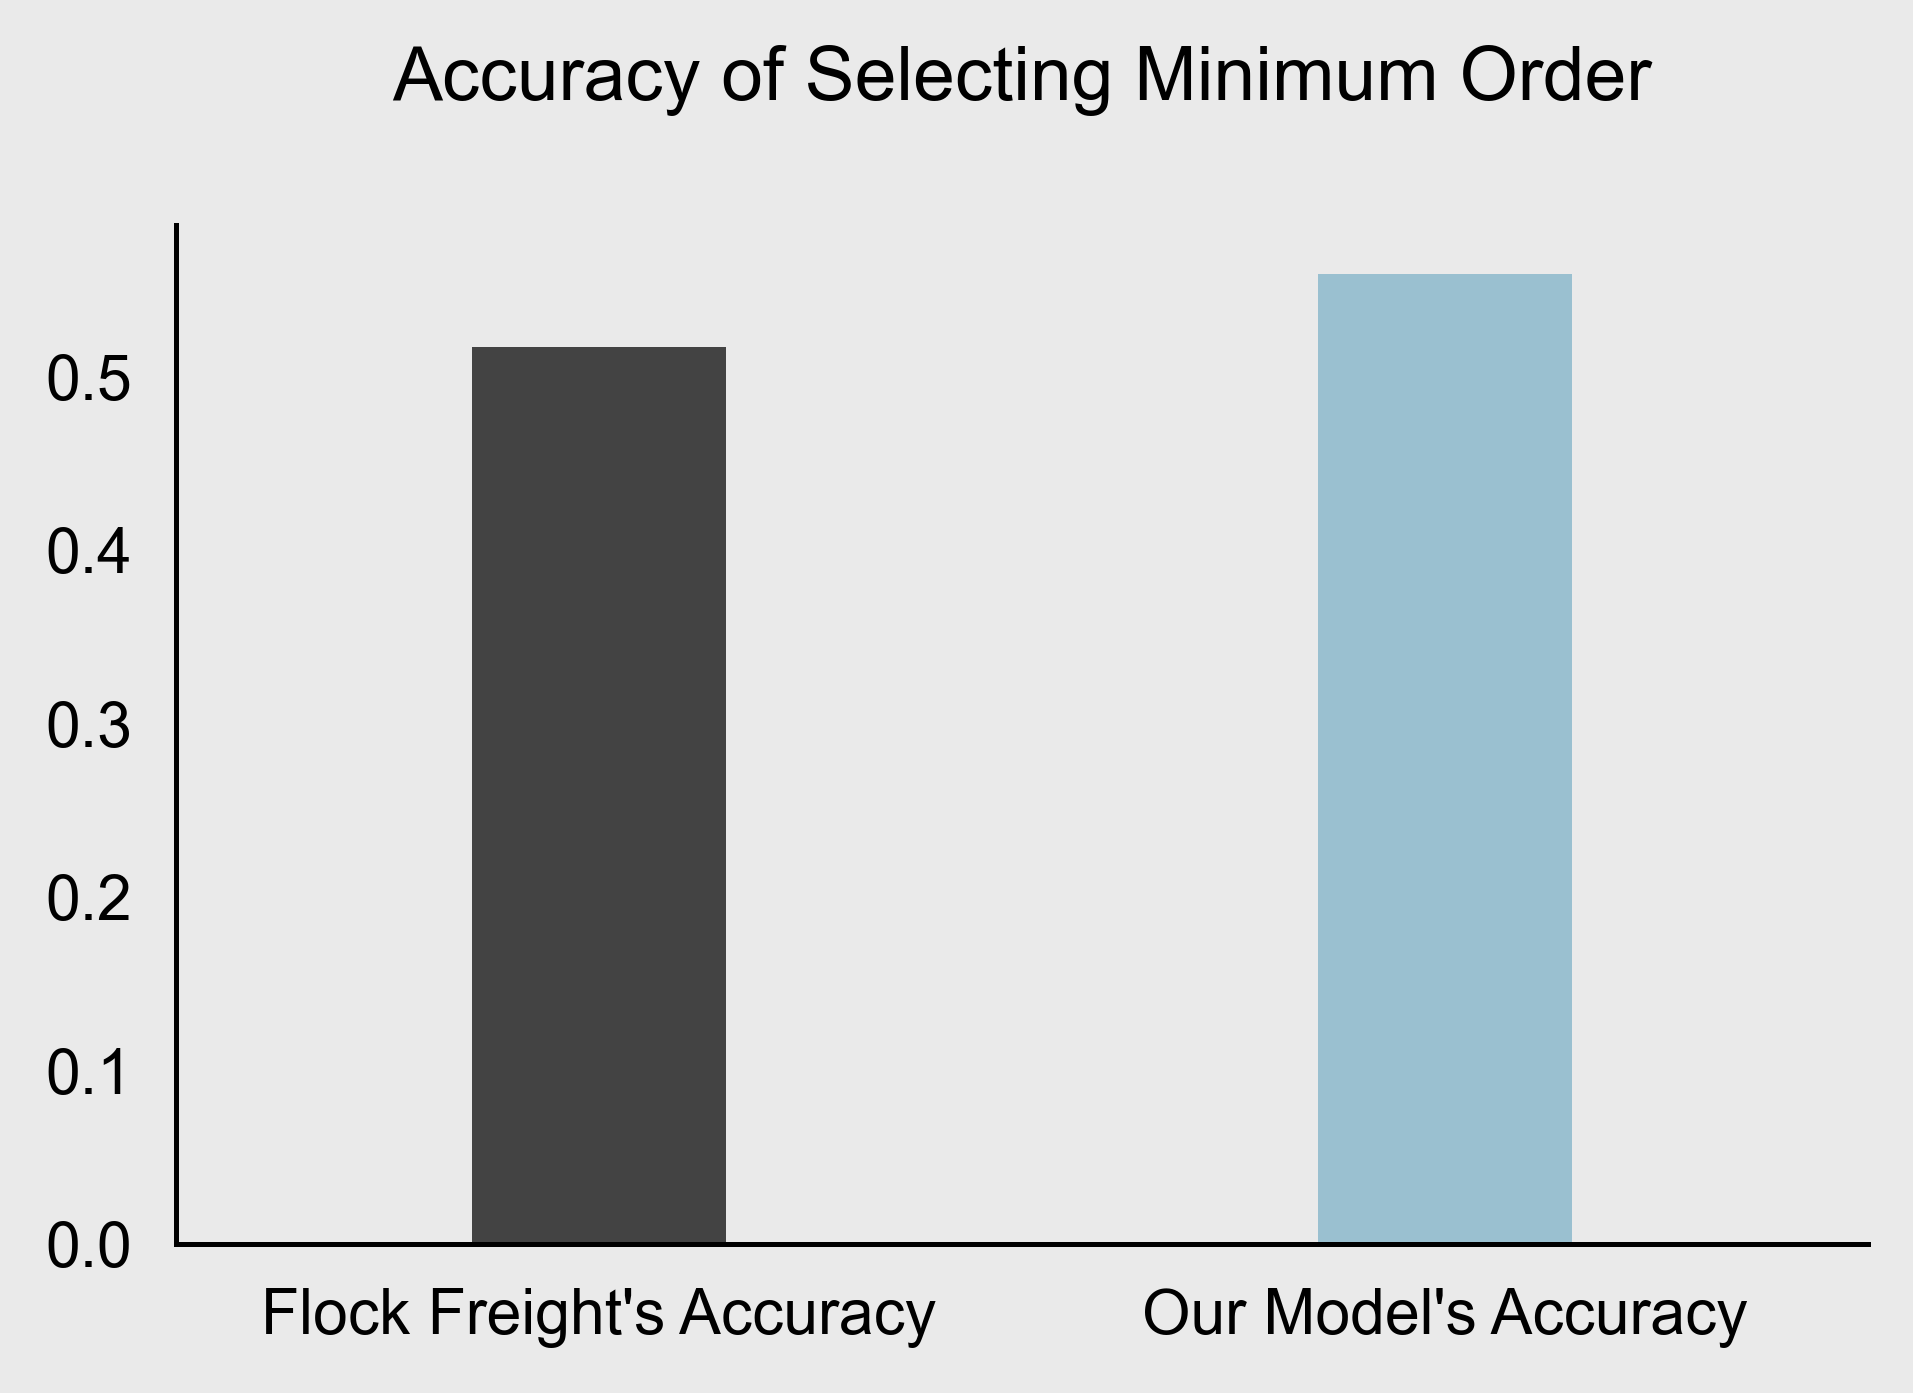

In [54]:
# cols = ['grey' if (x < max(df.sales)) else 'orange' for x in df.sales]

sns.barplot(data = pd.DataFrame(Count), palette = ['#434343',BLUE], width = 0.3).set(title='Accuracy of Selecting Minimum Order')

# plt.bar(["Flock Freight's Accuracy", "Our Model's Accuracy"],[0.5174846672917596, 0.8429223603916566], color = ['#434343',BLUE], width = 0.5)
# plt.title("Minimum Prediction Model - MSE vs Model Method")
# plt.show()

[Text(0.5, 1.0, 'MSE Between Min Rate')]

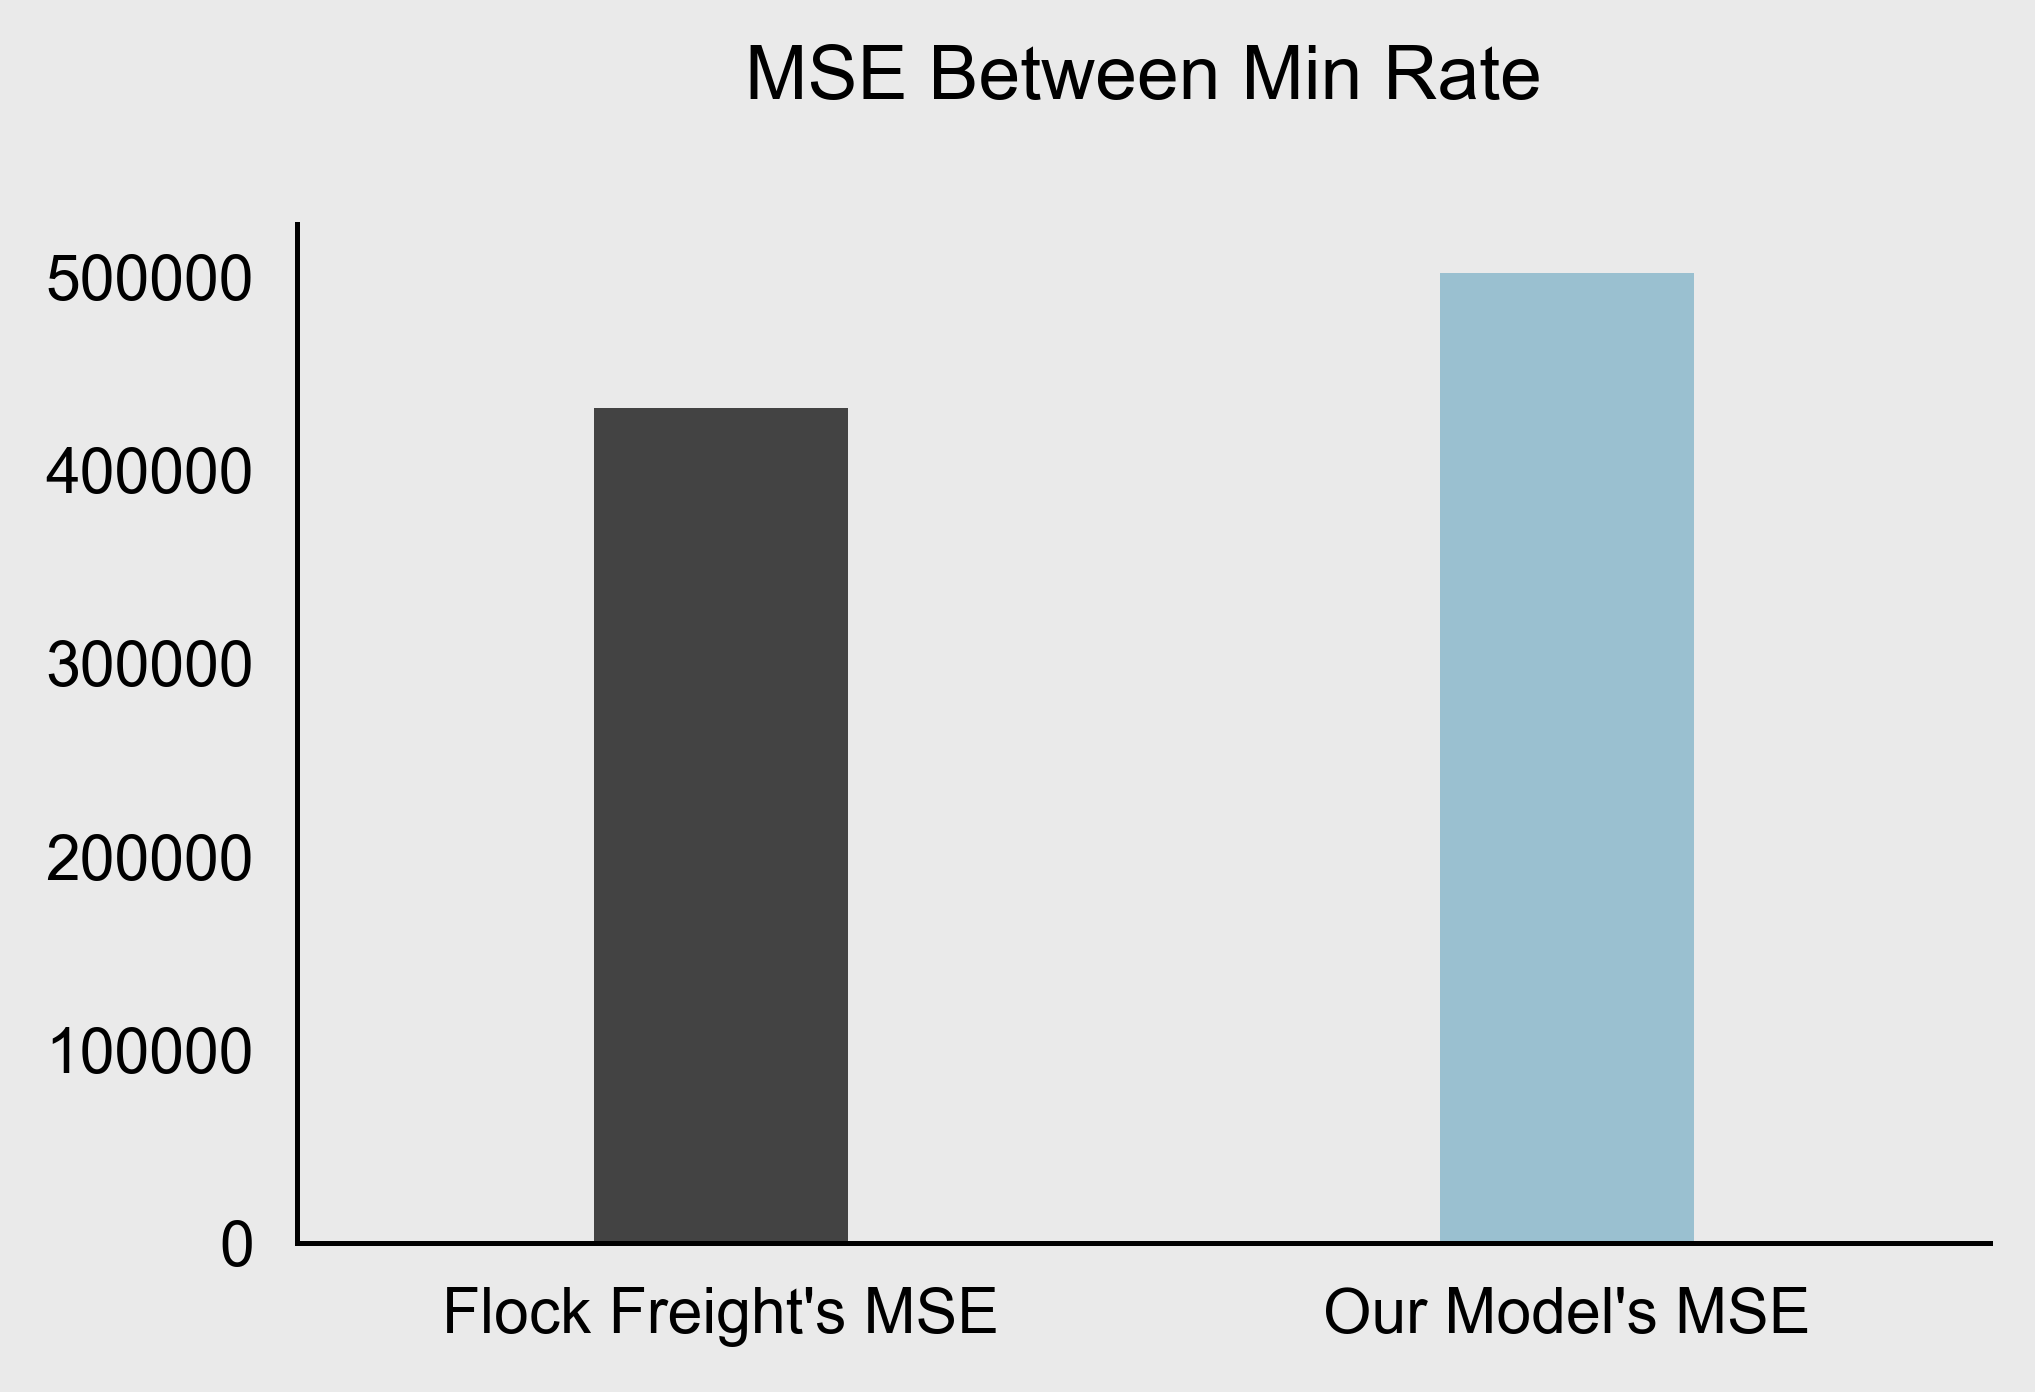

In [55]:
flock_freight_mse_btw_min_rate = ((is_min_true['ESTIMATED_COST_AT_ORDER'] - is_min_true['MIN_RATE']) ** 2).mean()
ours_mse_btw_min_rate = ((is_min_true['ESTIMATED_COST_AT_ORDER'] - is_min_true['PREDICTED_MIN_RATE']) ** 2).mean()
MSE = {"Flock Freight's MSE" : [flock_freight_mse_btw_min_rate], "Our Model's MSE" : [ours_mse_btw_min_rate]}
sns.barplot(data = pd.DataFrame(MSE), width = 0.3, palette = ['#434343', BLUE]).set(title='MSE Between Min Rate')



In [66]:
pd.DataFrame(MSE)

,Flock Freight's MSE,Our Model's MSE
0,429067.792087,461448.423096


In [67]:
(461448.423096 - 429067.792087) / 429067.792087

0.0754674007375374

### 밑부분은 전에 했던 모델이라 신경 X

### Regression models

### FTL linear model

In [63]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [64]:
merge_order.head(1)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,PREDICTED_NUMBER_OF_OFFERS
0,1,1,2019-11-13 05:30:16,1290.0,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,1


In [141]:
FTL = merge_order[merge_order['OFFER_IS_FTL'] == 1]

In [142]:
FTL[['ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X', 'DESTINATION_Y']]

,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y
0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06
1,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06
2,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06
3,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06
4,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06
...,...,...,...,...
687300,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06
687301,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06
687302,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06
687303,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06


In [84]:
def round_coords(df):
  df['ORIGIN_X'] = df['ORIGIN_X'].round(1)
  df['ORIGIN_Y'] = df['ORIGIN_Y'].round(1)
  df['DESTINATION_X'] = df['DESTINATION_X'].round(1)
  df['DESTINATION_Y'] = df['DESTINATION_Y'].round(1)
  return df

In [88]:
FTL = round_coords(FTL)

<ipython-input-84-c765a470c762>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORIGIN_X'] = df['ORIGIN_X'].round(1)
<ipython-input-84-c765a470c762>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORIGIN_Y'] = df['ORIGIN_Y'].round(1)
<ipython-input-84-c765a470c762>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [89]:
FTL.columns

Index(['CARRIER_ID', 'REFERENCE_NUMBER', 'CREATED_ON_HQ', 'RATE_USD',
       'IS_OFFER_APPROVED', 'LOAD_DELIVERED_FROM_OFFER', 'ORDER_DATETIME_PST',
       'PICKUP_DEADLINE_PST', 'ORIGIN_3DIGIT_ZIP', 'DESTINATION_3DIGIT_ZIP',
       'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET',
       'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
       'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED',
       'ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS',
       'REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X',
       'DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
       'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
       'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK',
       'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'OFFER_COUNT',
       'FTL_OFFER_COUNT', 'PREDICTED_NUMBER_OF_OFFERS'],
      dtype='object')

In [90]:
X = FTL[['IS_OFFER_APPROVED', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET','FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 
         'HAZARDOUS', 'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED',
         'ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 
         'DESTINATION_X','DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 
         'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK','OFFER_WEEK', 
         'ESTIMATED_MODE_IS_FTL', "OFFER_COUNT"]]
y = FTL[['RATE_USD']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [91]:
# create numerical value transformer
num_feat = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
            'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


# create pipeline
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', Ridge(alpha = 1))])
pl.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['LO...
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'ORDER_MONTH', 'ORDER_DAY',
                                                   'ORDER_DAY_OF_WEEK',
                                                   'ORDER_WEEK',
                                                   'DEADLINE_MONTH',
                                                   'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK',
                                                   'ESTIMATED_MODE_IS_FTL',
                                                   'ORIGIN_X', 'ORIGIN_Y',
                                                   'DESTINATION_X',
                                                   'DESTINATION_Y'])])),
                ('regressor', Ridge(alpha=1))])

In [92]:
y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

ValueError: Found unknown categories [-12134397.9, -10226868.3] in column 21 during transform

In [45]:
feature_names = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y',
            'IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 
            'ESTIMATED_MODE_IS_FTL']

In [46]:
pl.named_steps['preprocessor']

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MaxAbsScaler())]),
                                 ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                  'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
                                  'ESTIMATED_COST_AT_ORDER',
                                  'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS',
                                  'REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y',
                                  'DESTINATION_X', 'DESTINATION_Y']),
                                ('categorization',
                                 Pipeline(steps=[('onehot', Or...
                                  'IS_OFFER_APPROVED', 'FD_ENABLED',
                                  'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS',
                                  'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED',
                                  'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH',
                                  'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
                                  'ORDER_WEEK', 'DEADLINE_MONTH',
                                  'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
                                  'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY',
                                  'OFFER_DAY_OF_WEEK', 'OFFER_WEEK',
                                  'ESTIMATED_MODE_IS_FTL'])])

In [47]:
feature_coef = abs(pl.named_steps['regressor'].coef_[0])
feature_coef

array([5.74731536e+03, 1.37012770e+04, 3.00408797e+04, 8.01993871e+04,
       6.69017857e+02, 9.25179174e+03, 3.73361171e+03, 4.75890796e+04,
       2.87862688e+04, 4.58193087e+04, 6.43263055e+03, 2.22108786e+03,
       3.99430869e+03, 5.04504709e+03, 1.98494734e+03, 1.14192200e+04,
       7.51572387e+03, 6.13590824e+03, 5.25852411e+03, 1.88277563e+03,
       1.56116092e+01, 2.89738828e+01, 5.75121829e+02, 6.03163910e+03,
       8.38278367e+02, 2.89738828e+01, 8.78705613e+02, 3.01535605e+03,
       9.79845409e+02, 2.89738828e+01, 1.84417881e+02, 4.77350482e+02])

Text(0.5, 1.0, 'Feature Coef')

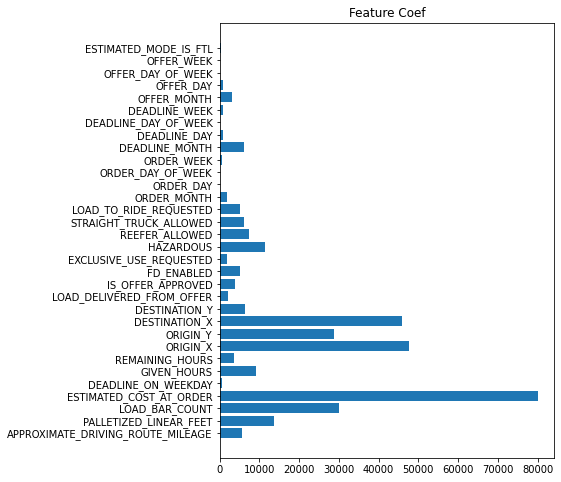

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.barh(feature_names,feature_coef, align='center',)
plt.title("Feature Coef")

In [49]:
# create numerical value transformer
num_feat = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 'GIVEN_HOURS',
            'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', "DEADLINE_MONTH"]
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


# create pipeline
ftl_pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', Ridge(alpha = 1))])
ftl_pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'GIVEN_HOURS', 'ORIGIN_X',
                                                   'ORIGIN_Y', 'DESTINATION_X',
                                                   'DESTINATION_Y']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['IS_OFFER_APPROVED',
                                                   'FD_ENABLED', 'HAZARDOUS',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'DEADLINE_MONTH'])])),
                ('regressor', Ridge(alpha=1))])

In [50]:
y_preds = ftl_pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

246089492682.2878

In [51]:
246089492682 ** 0.5

496074.0798328411

In [52]:
Ridge_MSE = []

for parameter in [0.001,0.01,0.1,1,10,20,30,40]:

  ftl_pl = Pipeline(steps=[('preprocessor', preproc), ("regressor", Ridge(alpha = parameter))])

  ftl_pl.fit(X_train, y_train)
  y_preds = ftl_pl.predict(X_test)

  mse = mean_squared_error(y_test, y_preds)
  Ridge_MSE.append(mse)
  
Lasso_MSE = []

for parameter in [0.001,0.01,0.1,1,10,20,30,40]:

  ftl_pl = Pipeline(steps=[('preprocessor', preproc), ("regressor", Lasso(alpha = parameter))])

  ftl_pl.fit(X_train, y_train)
  y_preds = ftl_pl.predict(X_test)

  mse = mean_squared_error(y_test, y_preds)
  Lasso_MSE.append(mse)

In [53]:
min(Ridge_MSE)

246088096582.0693

In [54]:
min(Lasso_MSE)

246075299731.9925

In [55]:
Lasso_MSE.index(min(Lasso_MSE))

7

In [56]:
[0.001,0.01,0.1,1,10,20,30,40][7]

40

In [57]:
ftl_pl = Pipeline(steps=[('preprocessor', preproc), ("regressor", Lasso(alpha = 40))])
ftl_pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'GIVEN_HOURS', 'ORIGIN_X',
                                                   'ORIGIN_Y', 'DESTINATION_X',
                                                   'DESTINATION_Y']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['IS_OFFER_APPROVED',
                                                   'FD_ENABLED', 'HAZARDOUS',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'DEADLINE_MONTH'])])),
                ('regressor', Lasso(alpha=40))])

In [58]:
FTL['PREDICTED_FTL_COST'] = ftl_pl.predict(X)
FTL

<ipython-input-58-4b56a056b48a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FTL['PREDICTED_FTL_COST'] = ftl_pl.predict(X)


,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT,PREDICTED_NUMBER_OF_OFFERS,PREDICTED_FTL_COST
0,1,1,2019-11-13 05:30:16,1290.0,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1,1,1912.305820
1,2,2,2019-12-06 08:43:01,2709.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,6,3599.791312
2,3,2,2019-12-06 08:45:31,3225.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,6,3599.791312
3,4,2,2019-12-06 08:48:09,2580.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,6,3599.791312
4,5,2,2019-12-06 08:49:46,3870.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6,6,3599.791312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687300,13330,186211,2022-05-18 05:57:19,1741.5,0,0,2022-05-12 14:39:39,2022-05-18 10:00:00,748,644,406.0,52.0,1,0,0,0,0,0.0,0,1161.0000,1,139.0,4.0,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06,5,12,2,19,5,18,2,20,5,18,2,20,1,1,9,9,9,-1510.096763
687301,51994,186211,2022-05-18 06:00:09,1818.9,0,0,2022-05-12 14:39:39,2022-05-18 10:00:00,748,644,406.0,52.0,1,0,0,0,0,0.0,0,1161.0000,1,139.0,3.0,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06,5,12,2,19,5,18,2,20,5,18,2,20,1,1,9,9,9,-1510.096763
687302,714,186211,2022-05-18 06:06:53,1806.0,0,0,2022-05-12 14:39:39,2022-05-18 10:00:00,748,644,406.0,52.0,1,0,0,0,0,0.0,0,1161.0000,1,139.0,3.0,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06,5,12,2,19,5,18,2,20,5,18,2,20,1,1,9,9,9,-1510.096763
687303,13330,186211,2022-05-18 06:20:13,1548.0,1,0,2022-05-12 14:39:39,2022-05-18 10:00:00,748,644,406.0,52.0,1,0,0,0,0,0.0,0,1161.0000,1,139.0,3.0,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06,5,12,2,19,5,18,2,20,5,18,2,20,1,1,9,9,9,-5957.259188


### Pool Linear Regression

In [293]:
merged.head(1)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,PREDICTED_NUMBER_OF_OFFERS
0,1,1,2019-11-13 05:30:16,1290.0,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1


In [294]:
PTL = merge_order[merge_order['OFFER_IS_FTL'] == 0]
PTL

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
7,8,3,2020-03-18 12:38:50,1161.000000,0,1,2020-03-17 13:58:25,2020-03-19 14:00:00,380,787,682.0,16.0,1,0,0,1,1,0.0,1,1209.3750,1,48.0,25.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,3,17,2,12,3,19,2,12,3,18,2,12,0,0,2,0
8,9,3,2020-03-18 13:37:51,1483.500000,0,0,2020-03-17 13:58:25,2020-03-19 14:00:00,380,787,682.0,16.0,1,0,0,1,1,0.0,1,1209.3750,1,48.0,24.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,3,17,2,12,3,19,2,12,3,18,2,12,0,0,2,0
16,16,7,2021-03-24 11:28:57,1806.000000,0,0,2021-03-24 07:19:50,2021-03-26 19:00:00,273,787,1299.0,26.0,1,0,0,1,1,0.0,0,1817.2488,1,59.0,55.0,-8.857569e+06,4.252157e+06,-1.088781e+07,3.518917e+06,3,24,2,12,3,26,2,12,3,24,2,12,0,0,2,0
17,16,7,2021-03-24 11:33:26,1806.000000,1,1,2021-03-24 07:19:50,2021-03-26 19:00:00,273,787,1299.0,26.0,1,0,0,1,1,0.0,0,1817.2488,1,59.0,55.0,-8.857569e+06,4.252157e+06,-1.088781e+07,3.518917e+06,3,24,2,12,3,26,2,12,3,24,2,12,0,0,2,0
48,46,23,2021-08-05 12:30:25,691.659574,1,0,2021-08-04 13:00:45,2021-08-11 12:00:00,750,787,211.0,18.0,1,0,0,0,1,0.0,0,1016.6490,1,166.0,143.0,-1.076722e+07,3.902611e+06,-1.088781e+07,3.518917e+06,8,4,3,31,8,11,3,32,8,5,3,31,0,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687304,12423,186212,2021-06-23 13:36:53,7659.375000,1,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,25.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,2,25,6,24,2,25,6,23,2,25,0,0,5,0
687305,1688,186212,2021-06-24 05:56:38,7417.500000,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0
687306,1688,186212,2021-06-24 06:00:00,7417.500000,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0
687307,570,186212,2021-06-24 06:06:34,7659.375000,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0


In [295]:
X = PTL[['IS_OFFER_APPROVED', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET','FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 
         'HAZARDOUS', 'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED',
         'ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 
         'DESTINATION_X','DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 
         'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK','OFFER_WEEK', 
         'ESTIMATED_MODE_IS_FTL', "OFFER_COUNT"]]
y = PTL[['RATE_USD']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

In [296]:
# create numerical value transformer
num_feat = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
            'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'ESTIMATED_MODE_IS_FTL']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


# create pipeline
ptl_pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', Ridge(alpha = 1))])
ptl_pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'ORIGIN_X', 'ORIGIN_Y',
                                                   'DESTINATION_X',
                                                   'DESTINATION_Y']),
                                                 ('categorizati...
                                                   'EXCLUSIVE_USE_REQUESTED',
                                                   'HAZARDOUS',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'ORDER_MONTH', 'ORDER_DAY',
                                                   'ORDER_DAY_OF_WEEK',
                                                   'ORDER_WEEK',
                                                   'DEADLINE_MONTH',
                                                   'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK',
                                                   'ESTIMATED_MODE_IS_FTL'])])),
                ('regressor', Ridge(alpha=1))])

In [300]:
y_preds = ptl_pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

14774378334.307426

In [301]:
feature_names = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y',
            'IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 
            'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 
            'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 
            'ESTIMATED_MODE_IS_FTL']

In [302]:
feature_coef = abs(ptl_pl.named_steps['regressor'].coef_[0])
feature_coef

array([5.88525950e+02, 6.81844462e+03, 1.12174158e+04, 1.39809104e+05,
       2.81324395e+03, 1.13890504e+04, 3.47434359e+03, 1.10356628e+04,
       1.20040336e+04, 5.21949799e+03, 6.57566526e+03, 1.00318223e+03,
       2.61667668e+03, 5.13110842e+03, 7.61208851e+03, 1.14026867e+03,
       1.81507663e+00, 1.37873635e+03, 3.93451821e+02, 1.16483168e+03,
       1.45568080e+02, 2.10676470e+02, 2.92602853e+01, 3.20908363e+02,
       9.71260481e+00, 2.10676470e+02, 9.18197718e+01, 1.53403157e+03,
       3.19479283e+02, 2.10676470e+02, 2.08497540e+02, 2.81924123e+03])

Text(0.5, 1.0, 'Feature Coef')

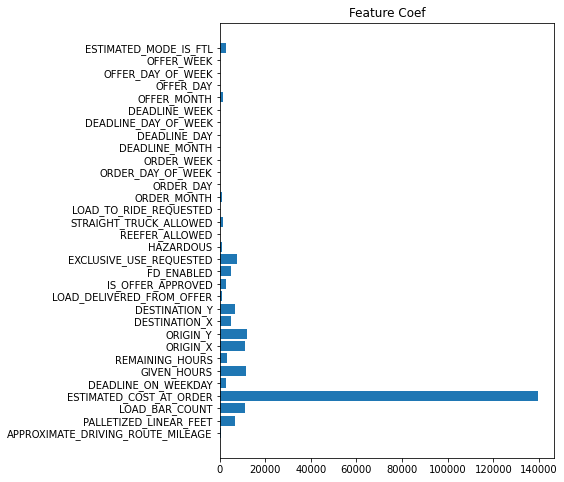

In [303]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.barh(feature_names,feature_coef, align='center',)
plt.title("Feature Coef")

In [304]:
# create numerical value transformer
num_feat = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'STRAIGHT_TRUCK_ALLOWED', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 
            'ESTIMATED_MODE_IS_FTL']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


# create pipeline
ptl_pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', Ridge(alpha = 1))])
ptl_pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'ORIGIN_X', 'ORIGIN_Y',
                                                   'DESTINATION_X',
                                                   'DESTINATION_Y']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['FD_ENABLED',
                                                   'EXCLUSIVE_USE_REQUESTED',
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'ESTIMATED_MODE_IS_FTL'])])),
                ('regressor', Ridge(alpha=1))])

In [305]:
y_preds = ptl_pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

14773102158.467123

In [306]:
Ridge_MSE = []

for parameter in [0.001,0.01,0.1,1,10,20,30,40]:

  ptl_pl = Pipeline(steps=[('preprocessor', preproc), ("regressor", Ridge(alpha = parameter))])

  ptl_pl.fit(X_train, y_train)
  y_preds = ptl_pl.predict(X_test)

  mse = mean_squared_error(y_test, y_preds)
  Ridge_MSE.append(mse)
  
Lasso_MSE = []

for parameter in [0.001,0.01,0.1,1,10,20,30,40]:

  ptl_pl = Pipeline(steps=[('preprocessor', preproc), ("regressor", Lasso(alpha = parameter))])

  ptl_pl.fit(X_train, y_train)
  y_preds = ptl_pl.predict(X_test)

  mse = mean_squared_error(y_test, y_preds)
  Lasso_MSE.append(mse)

In [307]:
min(Ridge_MSE)

14771748523.802044

In [308]:
min(Lasso_MSE)

14768756037.756683

In [309]:
Lasso_MSE.index(min(Lasso_MSE))

7

In [310]:
[0.001,0.01,0.1,1,10,20,30,40][7]

40

In [311]:
ptl_pl = Pipeline(steps=[('preprocessor', preproc), ("regressor", Lasso(alpha = 40))])
ptl_pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'ORIGIN_X', 'ORIGIN_Y',
                                                   'DESTINATION_X',
                                                   'DESTINATION_Y']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['FD_ENABLED',
                                                   'EXCLUSIVE_USE_REQUESTED',
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'ESTIMATED_MODE_IS_FTL'])])),
                ('regressor', Lasso(alpha=40))])

In [312]:
PREDICTED_COST_PTL = ptl_pl.predict(X)

### Pool Probability Model

In [313]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
import xgboost

In [314]:
merge_order

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
0,1,1,2019-11-13 05:30:16,1290.000,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1
1,2,2,2019-12-06 08:43:01,2709.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
2,3,2,2019-12-06 08:45:31,3225.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
3,4,2,2019-12-06 08:48:09,2580.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
4,5,2,2019-12-06 08:49:46,3870.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687305,1688,186212,2021-06-24 05:56:38,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0
687306,1688,186212,2021-06-24 06:00:00,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0
687307,570,186212,2021-06-24 06:06:34,7659.375,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0
687308,570,186212,2021-06-24 06:06:53,7256.250,1,1,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0


In [315]:
delivered = merge_order[merge_order['LOAD_DELIVERED_FROM_OFFER'] == 1]

In [316]:
X = delivered[['IS_OFFER_APPROVED', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET','FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 
         'HAZARDOUS', 'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED',
         'ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 
         'DESTINATION_X','DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 
         'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK','OFFER_WEEK', 
         'ESTIMATED_MODE_IS_FTL', "OFFER_COUNT"]]
y = delivered[['OFFER_IS_FTL']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

In [317]:
# create numerical value transformer
num_feat = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler()) # z-scale
])

# create categorical value transformer
cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
            'STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 
            'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 
            'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'ESTIMATED_MODE_IS_FTL']
cat_transformer = Pipeline(steps=[
    ("onehot", OrdinalEncoder()) # ordinal encode 
])

# combine numerical and categorical transformers
preproc = ColumnTransformer(
    transformers=[
        ("numerical", num_transformer, num_feat),
        ("categorization", cat_transformer, cat_feat)
    ])

# create pipeline
prob_pl = Pipeline(steps=[
    ('preprocessor', preproc), 
    ("xgb", xgboost.XGBClassifier())
])

In [318]:
prob_pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'ORIGIN_X', 'ORIGIN_Y',
                                                   'DESTINATION_X',
                                                   'DESTINATION_Y']),
                                                 ('categorizati...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [239]:
from sklearn.metrics import accuracy_score

In [319]:
y_preds = prob_pl.predict(X_test)
y_preds = (y_preds > 0.5)
acc = accuracy_score(y_preds, y_test)
acc

0.8645864824012093

#### It always predict as FTL

In [270]:
merge_order[merge_order['OFFER_IS_FTL'] == 1]

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
0,1,1,2019-11-13 05:30:16,1290.0,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1
1,2,2,2019-12-06 08:43:01,2709.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
2,3,2,2019-12-06 08:45:31,3225.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
3,4,2,2019-12-06 08:48:09,2580.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
4,5,2,2019-12-06 08:49:46,3870.0,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687300,13330,186211,2022-05-18 05:57:19,1741.5,0,0,2022-05-12 14:39:39,2022-05-18 10:00:00,748,644,406.0,52.0,1,0,0,0,0,0.0,0,1161.0000,1,139.0,4.0,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06,5,12,2,19,5,18,2,20,5,18,2,20,1,1,9,9
687301,51994,186211,2022-05-18 06:00:09,1818.9,0,0,2022-05-12 14:39:39,2022-05-18 10:00:00,748,644,406.0,52.0,1,0,0,0,0,0.0,0,1161.0000,1,139.0,3.0,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06,5,12,2,19,5,18,2,20,5,18,2,20,1,1,9,9
687302,714,186211,2022-05-18 06:06:53,1806.0,0,0,2022-05-12 14:39:39,2022-05-18 10:00:00,748,644,406.0,52.0,1,0,0,0,0,0.0,0,1161.0000,1,139.0,3.0,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06,5,12,2,19,5,18,2,20,5,18,2,20,1,1,9,9
687303,13330,186211,2022-05-18 06:20:13,1548.0,1,0,2022-05-12 14:39:39,2022-05-18 10:00:00,748,644,406.0,52.0,1,0,0,0,0,0.0,0,1161.0000,1,139.0,3.0,-1.076097e+07,4.163057e+06,-1.054290e+07,4.859358e+06,5,12,2,19,5,18,2,20,5,18,2,20,1,1,9,9


In [266]:
merge_order

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
0,1,1,2019-11-13 05:30:16,1290.000,0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,2,46,11,13,2,46,11,13,2,46,1,0,1,1
1,2,2,2019-12-06 08:43:01,2709.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
2,3,2,2019-12-06 08:45:31,3225.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
3,4,2,2019-12-06 08:48:09,2580.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
4,5,2,2019-12-06 08:49:46,3870.000,0,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,4,49,12,6,4,49,12,6,4,49,1,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687305,1688,186212,2021-06-24 05:56:38,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0
687306,1688,186212,2021-06-24 06:00:00,7417.500,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0
687307,570,186212,2021-06-24 06:06:34,7659.375,0,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0
687308,570,186212,2021-06-24 06:06:53,7256.250,1,1,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,3,25,6,24,3,25,6,24,3,25,0,0,5,0


In [268]:
delivered_orders_ref_num = merge_order[merge_order['LOAD_DELIVERED_FROM_OFFER'] == 1]['REFERENCE_NUMBER'].to_list()
delivered_only = merge_order[merge_order['REFERENCE_NUMBER'].isin(delivered_orders_ref_num)]

In [269]:
delivered_only.head(1)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,LOAD_DELIVERED_FROM_OFFER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
7,8,3,2020-03-18 12:38:50,1161.0,0,1,2020-03-17 13:58:25,2020-03-19 14:00:00,380,787,682.0,16.0,1,0,0,1,1,0.0,1,1209.375,1,48.0,25.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,3,17,2,12,3,19,2,12,3,18,2,12,0,0,2,0


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

In [256]:
X_test

,IS_OFFER_APPROVED,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,ESTIMATED_MODE_IS_FTL,OFFER_COUNT
187349,1,758.0,22.0,1,0,0,1,1,0.0,1,1708.3728,1,95.0,29.0,-9.328608e+06,4.082741e+06,-8.307412e+06,4.875350e+06,8,8,3,32,8,12,3,32,8,11,3,32,0,10
650456,1,108.0,44.0,1,1,0,1,1,0.0,0,1081.6908,1,27.0,27.0,-1.313942e+07,3.995777e+06,-1.328312e+07,4.246192e+06,4,18,0,16,4,19,0,16,4,18,0,16,1,4
667959,1,332.0,32.0,1,0,0,1,1,0.0,1,1299.4041,1,24.0,2.0,-1.001687e+07,3.451260e+06,-9.525947e+06,3.549902e+06,5,25,3,21,5,26,3,21,5,26,3,21,0,7
267501,0,411.0,21.0,1,0,0,0,1,0.0,0,1777.3620,1,24.0,24.0,-8.857569e+06,4.252157e+06,-8.364432e+06,4.838757e+06,8,23,0,34,8,24,0,34,8,23,0,34,0,1
555372,0,729.0,20.0,1,0,0,1,1,0.0,0,1219.6821,1,69.0,28.0,-1.076722e+07,3.902611e+06,-9.980344e+06,4.808904e+06,8,28,6,35,8,31,6,36,8,30,6,35,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509984,0,1375.0,52.0,1,0,0,1,1,0.0,0,3618.4500,1,49.0,3.0,-1.299374e+07,3.893229e+06,-1.085803e+07,3.819097e+06,6,17,4,25,6,19,4,25,6,19,4,25,1,3
27366,0,921.0,24.0,1,0,0,0,0,0.0,0,1847.0220,1,96.0,45.0,-1.084046e+07,3.841212e+06,-9.807845e+06,5.041104e+06,8,30,2,35,9,3,2,35,9,1,2,35,0,2
648881,1,2698.0,52.0,1,1,0,0,0,0.0,0,8770.6584,1,28.0,7.0,-1.333939e+07,4.076235e+06,-8.615620e+06,4.406487e+06,6,21,2,25,6,22,2,25,6,22,2,25,1,3
209505,0,483.0,22.0,1,0,0,1,1,0.0,0,1043.8809,1,23.0,2.0,-1.332992e+07,4.796275e+06,-1.317046e+07,4.010732e+06,8,24,2,34,8,25,2,34,8,25,2,34,0,3


In [69]:
X = merged[['IS_OFFER_APPROVED', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET','FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 
         'HAZARDOUS', 'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED',
         'ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 
         'DESTINATION_X','DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 
         'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK','OFFER_WEEK', 
         'ESTIMATED_MODE_IS_FTL', "OFFER_COUNT"]]
y = merged[['IS_MINIMUM']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

KeyError: "['OFFER_COUNT'] not in index"

In [ ]:
# create numerical value transformer
num_feat = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 
            'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
            'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'ESTIMATED_MODE_IS_FTL', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


# create pipeline
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', LogisticRegression())])
pl.fit(X_train, y_train)